### Pair Correlation for ICM Organoids

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import numpy as np
from scipy.spatial.distance import cdist
from Functions import *

C = pd.read_csv('Data/includingSurfaceDistance/extendedRawDataICMOrganoids.csv')
    
def paircorrelation(Population, Type, GraphDist):
    x = np.zeros(len(Population))
    x[(Population == Type)] = 1
    maxdist = int(np.max(GraphDist))
    ind = np.where(x==1)[0]
    if ind.size == 0:
        P = np.empty(maxdist)
        for i in range(1,maxdist+1):
            P[i-1] = 0
            
    else:
        dist = GraphDist[ind].T[ind].T
        rho0 = sum(x)/len(x)
        rho1 = (sum(x)-1)/(len(x)-1)


        P = np.empty(maxdist)
        for i in range(1,maxdist+1):
            P[i-1] = len(dist[dist==i])/len(GraphDist[GraphDist==i])/rho0/rho1

    return P


def correlation_correction(Population, Type, GraphDist):
    x = np.zeros(len(Population))
    y = np.zeros(len(Population))
    x[(Population == Type)] = 1
    y[(Population == 'N+G+') | (Population == 'N-G-')] = 1
    maxdist = int(np.max(GraphDist))
    ind = np.where(x==1)[0]
    cor_ind = np.where(y==1)[0]
    if ind.size == 0:
        P = np.empty(maxdist)
        for i in range(1,maxdist+1):
            P[i-1] = 0
            
    else:
        equals = GraphDist[ind].T[ind].T
        mixed = GraphDist[cor_ind].T[ind].T
        none =  GraphDist[cor_ind].T[cor_ind].T
        
        rho_equals = sum(x)*(sum(x)-1)/len(x)/(len(x)-1)
        rho_mixed = sum(x)*sum(y)/len(x)/(len(x)-1)
        rho_none = sum(y)*(sum(y)-1)/len(x)/(len(x)-1)
        
        rho_total = (sum(x) + sum(y)/2)*(sum(x)-1 + sum(y)/2)/len(x)/(len(x)-1)

        P = np.empty(maxdist)
        for i in range(1,maxdist+1):
            P[i-1] = (len(equals[equals==i])/len(GraphDist[GraphDist==i])/rho_total \
                   + len(mixed[mixed==i])/len(GraphDist[GraphDist==i])/rho_total \
                   + 0.25*len(none[none==i])/len(GraphDist[GraphDist==i])/rho_total)

    return P


N = []
G = []
N_cor = []
G_cor = []
DN = []
DP = []
nofCells = []
Stage = []
N_mean = 0
G_mean = 0
DN_mean = 0
DP_mean = 0
number = 0
for K in range(max(C['OrganoidID'])):
    Organoids = max(C['OrganoidID'])
    ID = K+1
    Cindex = []
    Cells = []

    for i in range(len(C)):
        if C['OrganoidID'][i] == ID:
            Cindex.append(i)

    x = np.array(C.loc[Cindex,'CentroidX'])
    y = np.array(C.loc[Cindex,'CentroidY'])
    z = np.array(C.loc[Cindex,'CentroidZ'])
    Nanog = np.array(C.loc[Cindex,'Nanog-Avg'])
    Gata6 = np.array(C.loc[Cindex,'Gata6-Avg'])
    Population = np.array(C.loc[Cindex,'Population'])
    stage = np.array(C.loc[Cindex,'stage'])
    
    nofN = len(Population[Population == 'N+G-'])
    nofG = len(Population[Population == 'N-G+'])
    nofDP = len(Population[Population == 'N+G+'])
    nofDN = len(Population[Population == 'N-G-'])
    
    #if nofDN/len(x) + nofDP/len(x) > 0.25 or stage[0]=='24h' or nofN/nofG < 2 or nofG/nofN < 2:
    #if stage[0]=='24h':
    #if nofG == 0:
    #    nofG = 1e-8
    #if nofN == 0:
    #    nofN = 1e-8
        
    if (nofDN/len(x) + nofDP/len(x) > 0.25 or stage[0]=='24h' or nofN/nofG > 2 or nofG/nofN > 2):
        continue

    #N_mean += nofN/len(x)
    #G_mean += nofG/len(x)
    #DN_mean += nofDN/len(x)
    #DP_mean += nofDP/len(x)
    #number += 1
        
    print('Organoid', ID, 'consists of', len(Cindex), 'cells')

    pos = np.empty([len(x), 3])
    pos[:,0] = x
    pos[:,1] = y
    pos[:,2] = z

    GraphDist = graphdistance3D(pos, cutoff=91)
    
    #Population[Nanog > Gata6] = 'N+G-'
    #Population[Nanog <= Gata6] = 'N-G+'
    N.append(paircorrelation(Population, 'N+G-', GraphDist))
    G.append(paircorrelation(Population, 'N-G+', GraphDist))
    N_cor.append(correlation_correction(Population, 'N+G-', GraphDist))
    G_cor.append(correlation_correction(Population, 'N-G+', GraphDist))
    DN.append(paircorrelation(Population, 'N-G-', GraphDist))
    DP.append(paircorrelation(Population, 'N+G+',GraphDist))
    Stage.append(stage[0])
    nofCells.append(len(x))
    
print('Finished!')

Organoid 14 consists of 1531 cells
Organoid 15 consists of 1474 cells
Organoid 39 consists of 935 cells
Organoid 47 consists of 962 cells
Organoid 50 consists of 812 cells
Organoid 51 consists of 955 cells
Organoid 52 consists of 984 cells
Organoid 53 consists of 751 cells
Organoid 54 consists of 663 cells
Organoid 62 consists of 1051 cells
Finished!


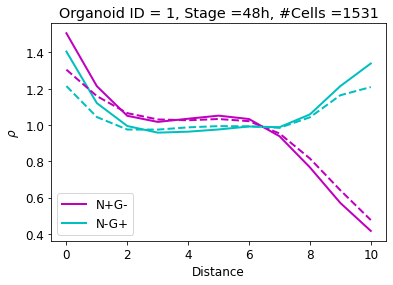

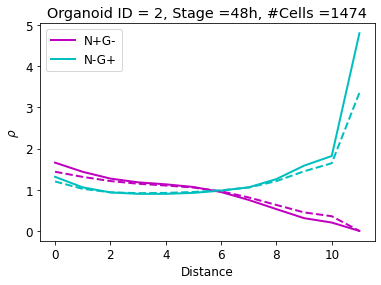

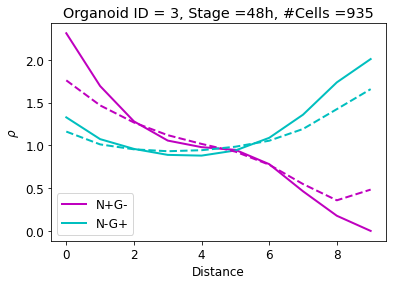

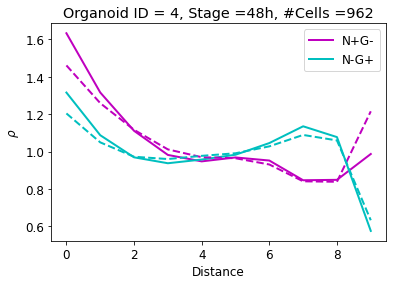

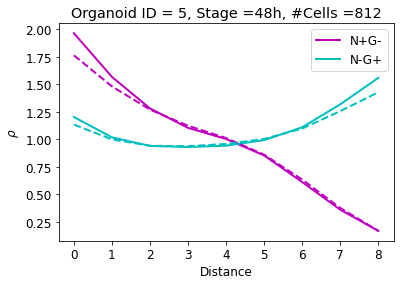

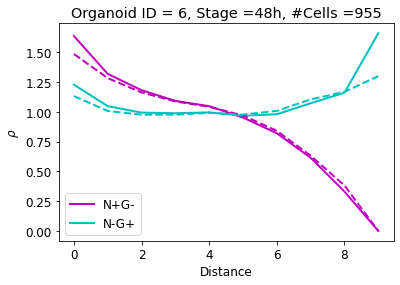

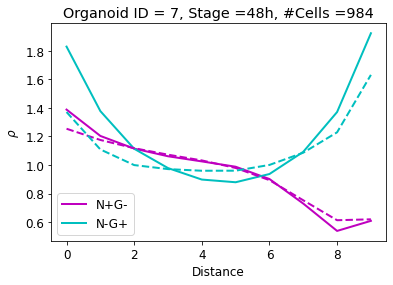

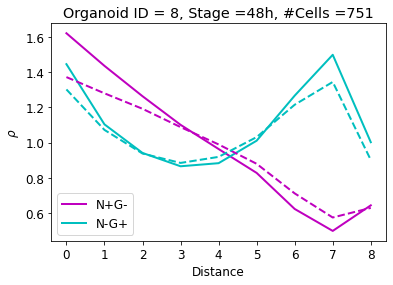

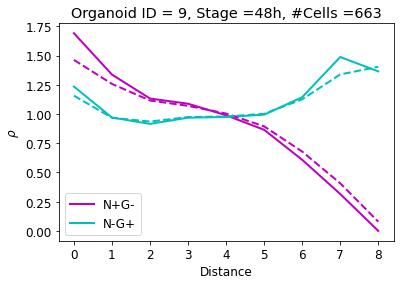

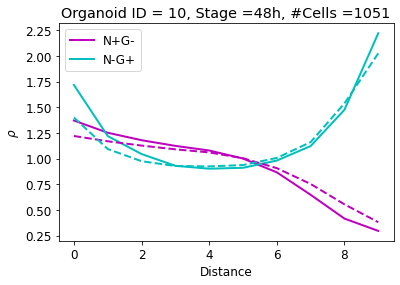

In [17]:
for i in range(len(N)):
    plt.figure()
    plt.rc('font', size=12)
    plt.plot(N[i], 'm', lw=2, label = 'N+G-')
    plt.plot(G[i], 'c', lw=2, label = 'N-G+')
    plt.plot(N_cor[i], 'm--', lw=2)
    plt.plot(G_cor[i], 'c--', lw=2)
    #plt.plot(DP[i], 'k--', alpha = 0.5, lw=2, label = 'N+G+')
    #plt.plot(DN[i], 'k', ls='dotted', alpha = 0.5, lw=2, label = 'N-G-')
    plt.title('Organoid ID = '+str(i+1)+ ', Stage ='+str(Stage[i])+', #Cells ='+str(nofCells[i]))
    plt.xlabel('Distance')
    plt.ylabel('$\\rho$')
    plt.legend()
    #plt.savefig('Results/Pair Correlations (without DN DP)/ID='+str(i+1)+'.png')

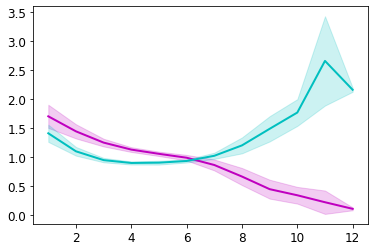

In [3]:
maxdist = 0
for i in range(len(N)):
    if maxdist < len(N[i]):
        maxdist = len(N[i])

amount = np.zeros(maxdist)
N_mean = np.zeros(maxdist)
G_mean = np.zeros(maxdist)
N_std = np.zeros(maxdist)
G_std = np.zeros(maxdist)
DN_mean = np.zeros(maxdist)
DP_mean = np.zeros(maxdist)
DN_std = np.zeros(maxdist)
DP_std = np.zeros(maxdist)
x = list(range(1,maxdist+1))
for i in range(len(N)):
    for j in range(len(N[i])):
        N_mean[j] += N[i][j]
        G_mean[j] += G[i][j]
        DN_mean[j] += DN[i][j]
        DP_mean[j] += DP[i][j]
        amount[j] += 1
        
N_mean = N_mean/amount
G_mean = G_mean/amount


for i in range(len(N)):
    for j in range(len(N[i])):
        N_std[j] += (N[i][j]-N_mean[j])**2
        G_std[j] += (G[i][j]-G_mean[j])**2
        DN_std[j] += (DN[i][j]-DN_mean[j])**2
        DP_std[j] += (DP[i][j]-DP_mean[j])**2
        amount[j] += 1

N_std = (N_std/amount)**(1/2)
G_std = (G_std/amount)**(1/2)
DN_std = (DN_std/amount)**(1/2)
DP_std = (DP_std/amount)**(1/2)
        
plt.plot(x, N_mean, 'm', lw = 2)
plt.plot(x, G_mean, 'c', lw = 2)
#plt.plot(x, DN_mean, 'k', lw = 2)
#plt.plot(x, DP_mean, 'b', lw = 2)
plt.fill_between(x, N_mean - N_std, N_mean + N_std, color='m', alpha = 0.2)
plt.fill_between(x, G_mean - G_std, G_mean + G_std, color='c', alpha = 0.2)
#plt.fill_between(x, DN_mean - DN_std, DN_mean + DN_std, color='k', alpha = 0.2)
#plt.fill_between(x, DP_mean - DP_std, DP_mean + DP_std, color='b', alpha = 0.2)

<br>
<br>
<br>

### Pair correlation for non-local model data

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from FVmesh import initializeFVmesh
from Organoid2D import initializeOrganoid
from Functions import loadData, fate
import networkx as nx

N = np.empty([9,177])
G = np.empty([9,177])

Pos, Radius, N[0,:], G[0,:] = loadData('Results/Publications/Pattern Formation/Cell Fate - q=1_10/Data.csv')
Pos, Radius, N[1,:], G[1,:] = loadData('Results/Publications/Pattern Formation/Cell Fate - q=2_10/Data.csv')
Pos, Radius, N[2,:], G[2,:] = loadData('Results/Publications/Pattern Formation/Cell Fate - q=3_10/Data.csv')
Pos, Radius, N[3,:], G[3,:] = loadData('Results/Publications/Pattern Formation/Cell Fate - q=4_10/Data.csv')
Pos, Radius, N[4,:], G[4,:] = loadData('Results/Publications/Pattern Formation/Cell Fate - q=5_10/Data.csv')
Pos, Radius, N[5,:], G[5,:] = loadData('Results/Publications/Pattern Formation/Cell Fate - q=6_10/Data.csv')
Pos, Radius, N[6,:], G[6,:] = loadData('Results/Publications/Pattern Formation/Cell Fate - q=7_10/Data.csv')
Pos, Radius, N[7,:], G[7,:] = loadData('Results/Publications/Pattern Formation/Cell Fate - q=8_10/Data.csv')
Pos, Radius, N[8,:], G[8,:] = loadData('Results/Publications/Pattern Formation/Cell Fate - q=9_10/Data.csv')

FVmesh = initializeFVmesh(Pos, Radius=Radius)
Gr = nx.Graph()
for path in FVmesh.Tri.simplices:

    path1 = [path[0], path[1]]
    path2 = [path[1], path[2]]
    path3 = [path[2], path[0]]

    if FVmesh.Dist[path1[0],path1[1]] < 2.2:
        nx.add_path(Gr, path1)
    if FVmesh.Dist[path2[0],path2[1]] < 2.2:    
        nx.add_path(Gr, path2)
    if FVmesh.Dist[path3[0],path3[1]] < 2.2:
        nx.add_path(Gr, path3)
    
dist_dict = dict(nx.all_pairs_dijkstra_path_length(Gr))
GraphDist = np.empty([FVmesh.nofCells, FVmesh.nofCells])
for i in range(FVmesh.nofCells):
    for j in range(FVmesh.nofCells):
        GraphDist[i,j] = dist_dict[i][j]

colors = np.linspace(0,1,9)       
cmap = matplotlib.cm.get_cmap('jet')
plt.figure(figsize=[6.4, 4.8])
for i in range(len(N)):
    rgba = cmap(colors[i])
    x = np.array(fate(N[i,:], G[i,:]))
    maxdist = int(np.max(GraphDist))
    ind = np.where(x==1)[0]
    dist = GraphDist[ind].T[ind].T
    rho0 = sum(x)/len(x)
    rho1 = (sum(x)-1)/(len(x)-1)

    Px = np.empty(maxdist)
    for k in range(1,maxdist+1):
        Px[k-1] = len(dist[dist==k])/len(GraphDist[GraphDist==k])/rho0/rho1
        
    plt.rc('font', size=14)
    distances = [j for j in range(1,int(np.max(GraphDist))+1)]
    plt.plot(distances, Px, lw=2, label='$q = '+str((i+1)/10)+'$', color=rgba)
    plt.xlabel('Distance')
    plt.ylabel('$\\rho_n$')

test = np.linspace(0,1,len(PN)-2)
plt.axhline(1, color='k', lw=2, linestyle='--')
plt.legend(ncol=2)
plt.savefig('Results/Publications/Pattern Formation/pair_correlation_n_nonlocal.pdf')
plt.savefig('Results/Publications/Pattern Formation/pair_correlation_n_nonlocal.png')

plt.figure(figsize=[6.4, 4.8])
for i in range(len(N)):
    rgba = cmap(colors[i])
    x = np.array(fate(G[i,:], N[i,:]))
    maxdist = int(np.max(GraphDist))
    ind = np.where(x==1)[0]
    dist = GraphDist[ind].T[ind].T
    rho0 = sum(x)/len(x)
    rho1 = (sum(x)-1)/(len(x)-1)

    Px = np.empty(maxdist)
    for k in range(1,maxdist+1):
        Px[k-1] = len(dist[dist==k])/len(GraphDist[GraphDist==k])/rho0/rho1
        
    plt.rc('font', size=14)
    distances = [j for j in range(1,int(np.max(GraphDist))+1)]
    plt.plot(distances, Px, lw=2, label='$q = '+str((i+1)/10)+'$', color=rgba)
    plt.xlabel('Distance')
    plt.ylabel('$\\rho_g$')

plt.axhline(1, color='k', lw=2, linestyle='--')
plt.legend(ncol=2)
plt.savefig('Results/Publications/Pattern Formation/pair_correlation_g_nonlocal.pdf')
plt.savefig('Results/Publications/Pattern Formation/pair_correlation_g_nonlocal.png')

<br>
<br>
<br>

### Pair correlation / cell ratio for local model data

Text(0, 0.5, 'Proportion')

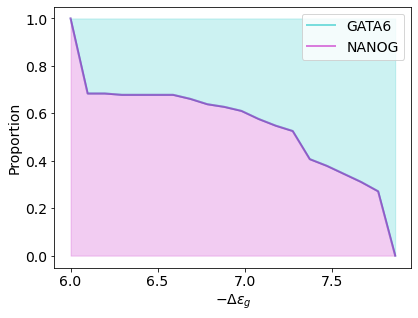

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from random import gauss
from FVmesh import initializeFVmesh
from Organoid2D import initializeOrganoid
from Functions import coverPlot, saveData, paircorrelation, fate
from Model import rhs_activation
from Parameters import setParameters
from scipy.integrate import solve_ivp
import networkx as nx
import pandas as pd
import os

def paircorrelation(N, G, GraphDist):
    x = np.zeros(len(N))
    x[N > G] = 1
    maxdist = int(np.max(GraphDist))
    ind = np.where(x==1)[0]
    if ind.size == 0:
        P = np.empty(maxdist)
        for i in range(1,maxdist+1):
            P[i-1] = 0
            
    else:
        dist = GraphDist[ind].T[ind].T
        rho0 = sum(x)/len(x)
        rho1 = (sum(x)-1)/(len(x)-1)


        P = np.empty(maxdist)
        for i in range(1,maxdist+1):
            P[i-1] = len(dist[dist==i])/len(GraphDist[GraphDist==i])/rho0/rho1

    return P


Prm = setParameters()
#Organoid = initializeOrganoid(Prm)
Data = pd.read_csv('Organoid_mid.csv')
Pos = Data[['x-Position', 'y-Position']].to_numpy()
Radius = Data['Radius'].to_numpy()
FVmesh = initializeFVmesh(Pos, Radius=Radius)


x0 = [Prm.r_N/Prm.gamma_N*3/4, Prm.r_G/Prm.gamma_G*3/4]
xInit = np.array([gauss(x0[0],x0[0]*0.01) if i < FVmesh.nofCells else 
                  gauss(x0[1],x0[1]*0.01) for i in range(2*FVmesh.nofCells)])

#eps_G = np.linspace(6,7.86,20)
q = 0.
Prm.range = q
s_max = Prm.r_G/Prm.gamma_G
upper_boundary = -Prm.eps_N + np.log(1 + np.exp(-Prm.eps_S-Prm.eps_NS)*s_max)
eps_G = np.linspace(-Prm.eps_N, upper_boundary, 20)
Ratio = np.empty(eps_G.shape)
PN = np.empty([len(eps_G), int(np.max(FVmesh.GraphDist))])
PG = np.empty([len(eps_G), int(np.max(FVmesh.GraphDist))])

for i in range(len(eps_G)):
    Prm.eps_G = -eps_G[i]
    Prm.T = 2400
    Prm.nofSteps = 30000
    t = np.linspace(0,Prm.T,Prm.nofSteps)
    rhs = lambda t,x: rhs_activation(0, x, Prm, FVmesh)
    sol = solve_ivp(rhs, [0,Prm.T], xInit, t_eval = t, method = 'RK23')

    N = sol.y[:FVmesh.nofCells,-1]
    G = sol.y[FVmesh.nofCells:,-1]

    F = [1 if N[i] >= G[i] else 0 for i in range(len(N))]
    #PN[i,:] = paircorrelation(N, G, FVmesh.GraphDist)
    #PG[i,:] = paircorrelation(G, N, FVmesh.GraphDist)

    Ratio[i] = np.sum(F)/FVmesh.nofCells


plt.figure(figsize=[6.4, 4.8])
plt.rc('font', size=14)
plt.plot(eps_G, Ratio, 'c', alpha=0.5, lw=2, label = 'GATA6')
plt.plot(eps_G, Ratio, 'm', alpha=0.5, lw=2, label = 'NANOG')
plt.fill_between(eps_G, Ratio, 1, color='c', alpha = 0.2)
plt.fill_between(eps_G, 0, Ratio, color='m', alpha = 0.2)
plt.legend()
plt.xlabel('$-\Delta\epsilon_g$')
plt.ylabel('Proportion')

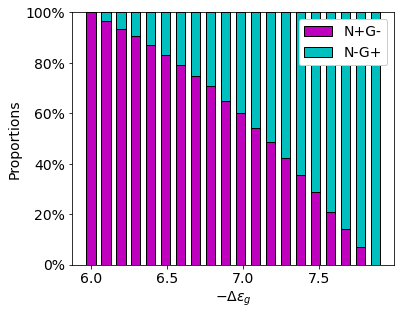

In [19]:
plt.figure(figsize=[6.4, 4.8])
plt.rc('font', size=14)
plt.bar(eps_G, Ratio*100, width=0.06, color = 'm', edgecolor='k', alpha = 1, label='N+G-')
plt.bar(eps_G, (1-Ratio)*100, bottom=Ratio*100, width=0.06, color = 'c', edgecolor='k', alpha = 1, label='N-G+')
ticks = [0,20,40,60,80,100]
plt.yticks(ticks, [str(x)+'%' for x in ticks])
plt.xlabel('$-\Delta\epsilon_g$')
plt.ylabel('Proportions')
plt.gcf().subplots_adjust(bottom=0.15)
plt.gcf().subplots_adjust(left=0.2)
plt.legend(framealpha=1)
plt.savefig('Results/Publications/Signal Range/Proportions q=0.9.pdf')
plt.savefig('Results/Publications/Signal Range/Proportions q=0.9.png')

In [ ]:
PN_mean = np.mean(PN, axis=0)
PN_std = np.std(PN, axis=0)
PG_mean = np.mean(PG, axis=0)
PG_std = np.std(PG, axis=0)


plt.figure()
plt.rc('font', size=14)
distances = [j for j in range(1,int(np.max(FVmesh.GraphDist))+1)]
plt.plot(distances, PN_mean, 'm')
plt.fill_between(distances, PN_mean-PN_std, PN_mean+PN_std, color='m', alpha = 0.2)
plt.ylim([0,2])

plt.rc('font', size=14)
distances = [j for j in range(1,int(np.max(FVmesh.GraphDist))+1)]
plt.plot(distances, PG_mean, 'c')
plt.fill_between(distances, PG_mean-PG_std, PG_mean+PG_std, color='c', alpha = 0.2)

In [ ]:
import matplotlib

cmap = matplotlib.cm.get_cmap('jet')
test = np.linspace(0,1,len(PN)-2)
distances = [j for j in range(1,int(np.max(FVmesh.GraphDist))+1)]
plt.figure(figsize=[6.4, 4.8])
plt.rc('font', size=14)
for i in range(len(PN)-2):
    rgba = cmap(test[i])
    
    plt.plot(distances,PN[i+1,:], color = rgba, lw=2)
    
plt.xlabel('Distance')
plt.ylabel('$\\rho_n$')
plt.ylim([0-0.12, max([np.max(PN), np.max(PG)])+0.12])
plt.savefig('Results/Publications/Pattern Formation/pair_correlation_n_local.pdf')
plt.savefig('Results/Publications/Pattern Formation/pair_correlation_n_local.png')

plt.figure(figsize=[6.4, 4.8])
plt.rc('font', size=14)
for i in range(len(PG)-2):
    rgba = cmap(test[i])
    
    plt.plot(distances,PG[i+1,:], color = rgba, lw=2)
    
plt.xlabel('Distance')
plt.ylabel('$\\rho_g$')
plt.ylim([0-0.12, max([np.max(PN), np.max(PG)])+0.12])
#sm = plt.cm.ScalarMappable(cmap='jet', norm=plt.Normalize(vmin=0, vmax=1))
#cbar = plt.colorbar(sm)
#cbar.ax.set_yticklabels([])
#cbar.set_label('$-\Delta\epsilon_g$')
plt.savefig('Results/Publications/Pattern Formation/pair_correlation_g_local.pdf')
plt.savefig('Results/Publications/Pattern Formation/pair_correlation_g_local.png')

In [ ]:
a = np.array([[6,7.86]])
plt.figure(figsize=(10, 4))
img = plt.imshow(a, cmap="jet")
plt.gca().set_visible(False)
plt.colorbar(orientation="vertical", label='$-\Delta\epsilon_g$', ticks=[6,6.93,7.86])
plt.savefig("Results/Publications/Pattern Formation/colorbar_local.pdf")
plt.savefig("Results/Publications/Pattern Formation/colorbar_local.png")

<br>
<br>
<br>

### ML Training Data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from FVmesh import initializeFVmesh
from Organoid2D import initializeOrganoid
from Functions import coverPlot, saveData, paircorrelation, fate
from Model import rhs_activation
from Parameters import setParameters
from scipy.integrate import solve_ivp
import pandas as pd

Prm = setParameters()
#Organoid = initializeOrganoid(Prm, Transcription=False, CellMax=150)
#Pos = Organoid.Pos
#FVmesh = initializeFVmesh(Pos, Radius=Organoid.Radius)

DATA = pd.DataFrame()
for i in range(1000):
    #Prm.eps_G = -10.7
    q = np.random.uniform(0,1)
    Prm.range = q
    Prm.nofCells_end = 300# + np.random.normal(0,10)
    Organoid = initializeOrganoid(Prm, Transcription=False, CellMax=150)
    Pos = Organoid.Pos
    FVmesh = initializeFVmesh(Pos, Radius=Organoid.Radius*1.2)
    #Pos = np.array(pd.read_csv('testOrganoid_small.csv'))
    #Radius = np.ones(len(Pos))*1.1
    #FVmesh = initializeFVmesh(Pos, Radius=Organoid.Radius)

    d_ij = FVmesh.GraphDist
    np.fill_diagonal(d_ij, 0)
    s_max = np.max(np.sum(Prm.r_G/Prm.gamma_G*q**d_ij, axis=1))/max(np.sum(q**d_ij, axis=1))
    upper_boundary = -Prm.eps_N + np.log(1 + np.exp(-Prm.eps_S-Prm.eps_NS)*s_max)
    #Prm.eps_G = -np.random.uniform(-Prm.eps_N, upper_boundary)
    Prm.eps_G = -7
    print('eps_G =', Prm.eps_G, upper_boundary)

    t = np.linspace(0,Prm.T,Prm.nofSteps)

    x0 = [Prm.r_N/Prm.gamma_N*3/4, Prm.r_G/Prm.gamma_G*3/4]
    xInit = np.append(np.random.normal(x0[0], x0[0]*0.01, FVmesh.nofCells),
                      np.random.normal(x0[1], x0[1]*0.01, FVmesh.nofCells))
    rhs = lambda t,x: rhs_activation(0, x, Prm, FVmesh)
    sol = solve_ivp(rhs, [0,Prm.T], xInit, t_eval = t, method = 'Radau')

    N = sol.y[:FVmesh.nofCells,-1]
    G = sol.y[FVmesh.nofCells:,-1]
    F = fate(N,G)

    print('ID =', i, 'Total =', len(N), 'NANOG =', len(N[N>G]), 'GATA6 =', len(G[G>N]))

    df = pd.DataFrame()
    df['ID'] = i*np.ones(len(F), dtype=int)
    df['x'] = Pos[:,0]
    df['y'] = Pos[:,1]
    df['fate'] = F
    df['range'] = q
    DATA = DATA.append(df)

DATA.to_csv('C:/Users/sis85wc/Desktop/ML Training Data/varying range+constrained ratio (Jonas)/Organoids.csv', index=False)

with open('C:/Users/sis85wc/Desktop/ML Training Data/varying range+constrained ratio (Jonas)/Organoids.txt', 'w') as f:
    print('Energy differences---------------------', file=f)
    print('eps_N =', Prm.eps_N, file=f)
    print('eps_G =', Prm.eps_G, file=f)
    print('eps_S =', Prm.eps_S, file=f)
    print('eps_NS =', Prm.eps_NS, file=f)
    print('', file=f)

    print('Reproduction rates---------------------', file=f)
    print('r_N =', Prm.r_N, file=f)
    print('r_G =', Prm.r_G, file=f)
    print('', file=f)

    print('Decay rates----------------------------', file=f)
    print('gamma_N =', Prm.gamma_N, file=f)
    print('gamma_G =', Prm.gamma_G, file=f)
    print('', file=f)

    print('Signal parameters----------------------', file=f)
    print('signal =', Prm.range, file=f)

Expected cell division time = 4.7441202514160725
Expected number of Cells = 193.17431641584017
eps_G = -7 7.865600680126628
ID = 0 Total = 150 NANOG = 60 GATA6 = 90
Expected cell division time = 4.7441202514160725
Expected number of Cells = 193.17431641584017
eps_G = -7 7.865600680126628
ID = 1 Total = 150 NANOG = 70 GATA6 = 80
Expected cell division time = 4.7441202514160725
Expected number of Cells = 193.17431641584017
eps_G = -7 7.865600680126627
ID = 2 Total = 150 NANOG = 80 GATA6 = 70
Expected cell division time = 4.7441202514160725
Expected number of Cells = 193.17431641584017
eps_G = -7 7.865600680126628
ID = 3 Total = 150 NANOG = 71 GATA6 = 79
Expected cell division time = 4.7441202514160725
Expected number of Cells = 193.17431641584017
eps_G = -7 7.865600680126628
ID = 4 Total = 150 NANOG = 84 GATA6 = 66
Expected cell division time = 4.7441202514160725
Expected number of Cells = 193.17431641584017
eps_G = -7 7.865600680126628
ID = 5 Total = 150 NANOG = 73 GATA6 = 77
Expected c

eps_G = -7 7.865600680126628
ID = 49 Total = 150 NANOG = 40 GATA6 = 110
Expected cell division time = 4.7441202514160725
Expected number of Cells = 193.17431641584017
eps_G = -7 7.865600680126628
ID = 50 Total = 150 NANOG = 68 GATA6 = 82
Expected cell division time = 4.7441202514160725
Expected number of Cells = 193.17431641584017
eps_G = -7 7.865600680126628
ID = 51 Total = 150 NANOG = 25 GATA6 = 125
Expected cell division time = 4.7441202514160725
Expected number of Cells = 193.17431641584017
eps_G = -7 7.865600680126628
ID = 52 Total = 150 NANOG = 38 GATA6 = 112
Expected cell division time = 4.7441202514160725
Expected number of Cells = 193.17431641584017
eps_G = -7 7.865600680126628
ID = 53 Total = 150 NANOG = 74 GATA6 = 76
Expected cell division time = 4.7441202514160725
Expected number of Cells = 193.17431641584017
eps_G = -7 7.865600680126628
ID = 54 Total = 150 NANOG = 41 GATA6 = 109
Expected cell division time = 4.7441202514160725
Expected number of Cells = 193.17431641584017


Expected cell division time = 4.7441202514160725
Expected number of Cells = 193.17431641584017
eps_G = -7 7.865600680126628
ID = 99 Total = 150 NANOG = 40 GATA6 = 110
Expected cell division time = 4.7441202514160725
Expected number of Cells = 193.17431641584017
eps_G = -7 7.865600680126628
ID = 100 Total = 150 NANOG = 95 GATA6 = 55
Expected cell division time = 4.7441202514160725
Expected number of Cells = 193.17431641584017
eps_G = -7 7.865600680126628
ID = 101 Total = 150 NANOG = 31 GATA6 = 119
Expected cell division time = 4.7441202514160725
Expected number of Cells = 193.17431641584017
eps_G = -7 7.865600680126628
ID = 102 Total = 150 NANOG = 69 GATA6 = 81
Expected cell division time = 4.7441202514160725
Expected number of Cells = 193.17431641584017
eps_G = -7 7.865600680126628
ID = 103 Total = 150 NANOG = 62 GATA6 = 88
Expected cell division time = 4.7441202514160725
Expected number of Cells = 193.17431641584017
eps_G = -7 7.865600680126628
ID = 104 Total = 150 NANOG = 88 GATA6 = 

Expected number of Cells = 193.17431641584017
eps_G = -7 7.865600680126628
ID = 148 Total = 150 NANOG = 46 GATA6 = 104
Expected cell division time = 4.7441202514160725
Expected number of Cells = 193.17431641584017
eps_G = -7 7.865600680126628
ID = 149 Total = 150 NANOG = 57 GATA6 = 93
Expected cell division time = 4.7441202514160725
Expected number of Cells = 193.17431641584017
eps_G = -7 7.865600680126628
ID = 150 Total = 150 NANOG = 46 GATA6 = 104
Expected cell division time = 4.7441202514160725
Expected number of Cells = 193.17431641584017
eps_G = -7 7.865600680126628
ID = 151 Total = 150 NANOG = 70 GATA6 = 80
Expected cell division time = 4.7441202514160725
Expected number of Cells = 193.17431641584017
eps_G = -7 7.865600680126628
ID = 152 Total = 150 NANOG = 73 GATA6 = 77
Expected cell division time = 4.7441202514160725
Expected number of Cells = 193.17431641584017
eps_G = -7 7.865600680126628
ID = 153 Total = 150 NANOG = 56 GATA6 = 94
Expected cell division time = 4.7441202514160

eps_G = -7 7.865600680126627
ID = 197 Total = 150 NANOG = 72 GATA6 = 78
Expected cell division time = 4.7441202514160725
Expected number of Cells = 193.17431641584017
eps_G = -7 7.865600680126628
ID = 198 Total = 150 NANOG = 78 GATA6 = 72
Expected cell division time = 4.7441202514160725
Expected number of Cells = 193.17431641584017
eps_G = -7 7.865600680126628
ID = 199 Total = 150 NANOG = 36 GATA6 = 114
Expected cell division time = 4.7441202514160725
Expected number of Cells = 193.17431641584017
eps_G = -7 7.865600680126628
ID = 200 Total = 150 NANOG = 67 GATA6 = 83
Expected cell division time = 4.7441202514160725
Expected number of Cells = 193.17431641584017
eps_G = -7 7.865600680126628
ID = 201 Total = 150 NANOG = 70 GATA6 = 80
Expected cell division time = 4.7441202514160725
Expected number of Cells = 193.17431641584017
eps_G = -7 7.865600680126628
ID = 202 Total = 150 NANOG = 69 GATA6 = 81
Expected cell division time = 4.7441202514160725
Expected number of Cells = 193.174316415840

ID = 246 Total = 150 NANOG = 72 GATA6 = 78
Expected cell division time = 4.7441202514160725
Expected number of Cells = 193.17431641584017
eps_G = -7 7.865600680126628
ID = 247 Total = 150 NANOG = 67 GATA6 = 83
Expected cell division time = 4.7441202514160725
Expected number of Cells = 193.17431641584017
eps_G = -7 7.865600680126628
ID = 248 Total = 150 NANOG = 98 GATA6 = 52
Expected cell division time = 4.7441202514160725
Expected number of Cells = 193.17431641584017
eps_G = -7 7.865600680126628
ID = 249 Total = 150 NANOG = 78 GATA6 = 72
Expected cell division time = 4.7441202514160725
Expected number of Cells = 193.17431641584017
eps_G = -7 7.865600680126628
ID = 250 Total = 150 NANOG = 66 GATA6 = 84
Expected cell division time = 4.7441202514160725
Expected number of Cells = 193.17431641584017
eps_G = -7 7.865600680126628
ID = 251 Total = 150 NANOG = 86 GATA6 = 64
Expected cell division time = 4.7441202514160725
Expected number of Cells = 193.17431641584017
eps_G = -7 7.86560068012662

Expected cell division time = 4.7441202514160725
Expected number of Cells = 193.17431641584017
eps_G = -7 7.865600680126628
ID = 296 Total = 150 NANOG = 56 GATA6 = 94
Expected cell division time = 4.7441202514160725
Expected number of Cells = 193.17431641584017
eps_G = -7 7.865600680126628
ID = 297 Total = 150 NANOG = 88 GATA6 = 62
Expected cell division time = 4.7441202514160725
Expected number of Cells = 193.17431641584017
eps_G = -7 7.865600680126628
ID = 298 Total = 150 NANOG = 74 GATA6 = 76
Expected cell division time = 4.7441202514160725
Expected number of Cells = 193.17431641584017
eps_G = -7 7.865600680126628
ID = 299 Total = 150 NANOG = 75 GATA6 = 75
Expected cell division time = 4.7441202514160725
Expected number of Cells = 193.17431641584017
eps_G = -7 7.865600680126628
ID = 300 Total = 150 NANOG = 69 GATA6 = 81
Expected cell division time = 4.7441202514160725
Expected number of Cells = 193.17431641584017
eps_G = -7 7.865600680126628
ID = 301 Total = 150 NANOG = 66 GATA6 = 8

Expected number of Cells = 193.17431641584017
eps_G = -7 7.865600680126627
ID = 345 Total = 150 NANOG = 64 GATA6 = 86
Expected cell division time = 4.7441202514160725
Expected number of Cells = 193.17431641584017
eps_G = -7 7.865600680126628
ID = 346 Total = 150 NANOG = 14 GATA6 = 136
Expected cell division time = 4.7441202514160725
Expected number of Cells = 193.17431641584017
eps_G = -7 7.865600680126627
ID = 347 Total = 150 NANOG = 0 GATA6 = 150
Expected cell division time = 4.7441202514160725
Expected number of Cells = 193.17431641584017
eps_G = -7 7.865600680126628
ID = 348 Total = 150 NANOG = 95 GATA6 = 55
Expected cell division time = 4.7441202514160725
Expected number of Cells = 193.17431641584017
eps_G = -7 7.865600680126628
ID = 349 Total = 150 NANOG = 60 GATA6 = 90
Expected cell division time = 4.7441202514160725
Expected number of Cells = 193.17431641584017
eps_G = -7 7.865600680126627
ID = 350 Total = 150 NANOG = 99 GATA6 = 51
Expected cell division time = 4.74412025141607

Expected number of Cells = 193.17431641584017
eps_G = -7 7.865600680126628
ID = 394 Total = 150 NANOG = 0 GATA6 = 150
Expected cell division time = 4.7441202514160725
Expected number of Cells = 193.17431641584017
eps_G = -7 7.865600680126628
ID = 395 Total = 150 NANOG = 80 GATA6 = 70
Expected cell division time = 4.7441202514160725
Expected number of Cells = 193.17431641584017
eps_G = -7 7.865600680126628
ID = 396 Total = 150 NANOG = 69 GATA6 = 81
Expected cell division time = 4.7441202514160725
Expected number of Cells = 193.17431641584017
eps_G = -7 7.865600680126627
ID = 397 Total = 150 NANOG = 88 GATA6 = 62
Expected cell division time = 4.7441202514160725
Expected number of Cells = 193.17431641584017
eps_G = -7 7.865600680126628
ID = 398 Total = 150 NANOG = 98 GATA6 = 52
Expected cell division time = 4.7441202514160725
Expected number of Cells = 193.17431641584017
eps_G = -7 7.865600680126628
ID = 399 Total = 150 NANOG = 74 GATA6 = 76
Expected cell division time = 4.744120251416072

eps_G = -7 7.865600680126628
ID = 443 Total = 150 NANOG = 51 GATA6 = 99
Expected cell division time = 4.7441202514160725
Expected number of Cells = 193.17431641584017
eps_G = -7 7.865600680126628
ID = 444 Total = 150 NANOG = 0 GATA6 = 150
Expected cell division time = 4.7441202514160725
Expected number of Cells = 193.17431641584017
eps_G = -7 7.865600680126627
ID = 445 Total = 150 NANOG = 73 GATA6 = 77
Expected cell division time = 4.7441202514160725
Expected number of Cells = 193.17431641584017
eps_G = -7 7.865600680126628
ID = 446 Total = 150 NANOG = 68 GATA6 = 82
Expected cell division time = 4.7441202514160725
Expected number of Cells = 193.17431641584017
eps_G = -7 7.865600680126628
ID = 447 Total = 150 NANOG = 24 GATA6 = 126
Expected cell division time = 4.7441202514160725
Expected number of Cells = 193.17431641584017
eps_G = -7 7.865600680126627
ID = 448 Total = 150 NANOG = 73 GATA6 = 77
Expected cell division time = 4.7441202514160725
Expected number of Cells = 193.174316415840

ID = 492 Total = 150 NANOG = 55 GATA6 = 95
Expected cell division time = 4.7441202514160725
Expected number of Cells = 193.17431641584017
eps_G = -7 7.865600680126628
ID = 493 Total = 150 NANOG = 39 GATA6 = 111
Expected cell division time = 4.7441202514160725
Expected number of Cells = 193.17431641584017
eps_G = -7 7.865600680126628
ID = 494 Total = 150 NANOG = 78 GATA6 = 72
Expected cell division time = 4.7441202514160725
Expected number of Cells = 193.17431641584017
eps_G = -7 7.865600680126627
ID = 495 Total = 150 NANOG = 41 GATA6 = 109
Expected cell division time = 4.7441202514160725
Expected number of Cells = 193.17431641584017
eps_G = -7 7.865600680126628
ID = 496 Total = 150 NANOG = 54 GATA6 = 96
Expected cell division time = 4.7441202514160725
Expected number of Cells = 193.17431641584017
eps_G = -7 7.865600680126628
ID = 497 Total = 150 NANOG = 77 GATA6 = 73
Expected cell division time = 4.7441202514160725
Expected number of Cells = 193.17431641584017
eps_G = -7 7.865600680126

Expected cell division time = 4.7441202514160725
Expected number of Cells = 193.17431641584017
eps_G = -7 7.865600680126627
ID = 542 Total = 150 NANOG = 0 GATA6 = 150
Expected cell division time = 4.7441202514160725
Expected number of Cells = 193.17431641584017
eps_G = -7 7.865600680126627
ID = 543 Total = 150 NANOG = 91 GATA6 = 59
Expected cell division time = 4.7441202514160725
Expected number of Cells = 193.17431641584017
eps_G = -7 7.865600680126628
ID = 544 Total = 150 NANOG = 49 GATA6 = 101
Expected cell division time = 4.7441202514160725
Expected number of Cells = 193.17431641584017
eps_G = -7 7.865600680126628
ID = 545 Total = 150 NANOG = 73 GATA6 = 77
Expected cell division time = 4.7441202514160725
Expected number of Cells = 193.17431641584017
eps_G = -7 7.865600680126628
ID = 546 Total = 150 NANOG = 78 GATA6 = 72
Expected cell division time = 4.7441202514160725
Expected number of Cells = 193.17431641584017
eps_G = -7 7.865600680126628
ID = 547 Total = 150 NANOG = 57 GATA6 = 

Expected number of Cells = 193.17431641584017
eps_G = -7 7.865600680126628
ID = 591 Total = 150 NANOG = 57 GATA6 = 93
Expected cell division time = 4.7441202514160725
Expected number of Cells = 193.17431641584017
eps_G = -7 7.865600680126628
ID = 592 Total = 150 NANOG = 76 GATA6 = 74
Expected cell division time = 4.7441202514160725
Expected number of Cells = 193.17431641584017
eps_G = -7 7.865600680126628
ID = 593 Total = 150 NANOG = 80 GATA6 = 70
Expected cell division time = 4.7441202514160725
Expected number of Cells = 193.17431641584017
eps_G = -7 7.865600680126628
ID = 594 Total = 150 NANOG = 80 GATA6 = 70
Expected cell division time = 4.7441202514160725
Expected number of Cells = 193.17431641584017
eps_G = -7 7.865600680126628
ID = 595 Total = 150 NANOG = 72 GATA6 = 78
Expected cell division time = 4.7441202514160725
Expected number of Cells = 193.17431641584017
eps_G = -7 7.865600680126627
ID = 596 Total = 150 NANOG = 69 GATA6 = 81
Expected cell division time = 4.744120251416072

eps_G = -7 7.865600680126628
ID = 640 Total = 150 NANOG = 41 GATA6 = 109
Expected cell division time = 4.7441202514160725
Expected number of Cells = 193.17431641584017
eps_G = -7 7.865600680126628
ID = 641 Total = 150 NANOG = 90 GATA6 = 60
Expected cell division time = 4.7441202514160725
Expected number of Cells = 193.17431641584017
eps_G = -7 7.865600680126628
ID = 642 Total = 150 NANOG = 61 GATA6 = 89
Expected cell division time = 4.7441202514160725
Expected number of Cells = 193.17431641584017
eps_G = -7 7.865600680126628
ID = 643 Total = 150 NANOG = 57 GATA6 = 93
Expected cell division time = 4.7441202514160725
Expected number of Cells = 193.17431641584017
eps_G = -7 7.865600680126628
ID = 644 Total = 150 NANOG = 0 GATA6 = 150
Expected cell division time = 4.7441202514160725
Expected number of Cells = 193.17431641584017
eps_G = -7 7.865600680126628
ID = 645 Total = 150 NANOG = 69 GATA6 = 81
Expected cell division time = 4.7441202514160725
Expected number of Cells = 193.174316415840

ID = 689 Total = 150 NANOG = 68 GATA6 = 82
Expected cell division time = 4.7441202514160725
Expected number of Cells = 193.17431641584017
eps_G = -7 7.865600680126628
ID = 690 Total = 150 NANOG = 21 GATA6 = 129
Expected cell division time = 4.7441202514160725
Expected number of Cells = 193.17431641584017
eps_G = -7 7.865600680126628
ID = 691 Total = 150 NANOG = 101 GATA6 = 49
Expected cell division time = 4.7441202514160725
Expected number of Cells = 193.17431641584017
eps_G = -7 7.865600680126628
ID = 692 Total = 150 NANOG = 67 GATA6 = 83
Expected cell division time = 4.7441202514160725
Expected number of Cells = 193.17431641584017
eps_G = -7 7.865600680126628
ID = 693 Total = 150 NANOG = 22 GATA6 = 128
Expected cell division time = 4.7441202514160725
Expected number of Cells = 193.17431641584017
eps_G = -7 7.865600680126627
ID = 694 Total = 150 NANOG = 73 GATA6 = 77
Expected cell division time = 4.7441202514160725
Expected number of Cells = 193.17431641584017
eps_G = -7 7.86560068012

Expected cell division time = 4.7441202514160725
Expected number of Cells = 193.17431641584017
eps_G = -7 7.865600680126628
ID = 739 Total = 150 NANOG = 75 GATA6 = 75
Expected cell division time = 4.7441202514160725
Expected number of Cells = 193.17431641584017
eps_G = -7 7.865600680126628
ID = 740 Total = 150 NANOG = 72 GATA6 = 78
Expected cell division time = 4.7441202514160725
Expected number of Cells = 193.17431641584017
eps_G = -7 7.865600680126628
ID = 741 Total = 150 NANOG = 82 GATA6 = 68
Expected cell division time = 4.7441202514160725
Expected number of Cells = 193.17431641584017
eps_G = -7 7.865600680126628
ID = 742 Total = 150 NANOG = 66 GATA6 = 84
Expected cell division time = 4.7441202514160725
Expected number of Cells = 193.17431641584017
eps_G = -7 7.865600680126628
ID = 743 Total = 150 NANOG = 73 GATA6 = 77
Expected cell division time = 4.7441202514160725
Expected number of Cells = 193.17431641584017
eps_G = -7 7.865600680126628
ID = 744 Total = 150 NANOG = 101 GATA6 = 

Expected number of Cells = 193.17431641584017
eps_G = -7 7.865600680126628
ID = 788 Total = 150 NANOG = 70 GATA6 = 80
Expected cell division time = 4.7441202514160725
Expected number of Cells = 193.17431641584017
eps_G = -7 7.865600680126628
ID = 789 Total = 150 NANOG = 70 GATA6 = 80
Expected cell division time = 4.7441202514160725
Expected number of Cells = 193.17431641584017
eps_G = -7 7.865600680126628
ID = 790 Total = 150 NANOG = 19 GATA6 = 131
Expected cell division time = 4.7441202514160725
Expected number of Cells = 193.17431641584017
eps_G = -7 7.865600680126628
ID = 791 Total = 150 NANOG = 52 GATA6 = 98
Expected cell division time = 4.7441202514160725
Expected number of Cells = 193.17431641584017
eps_G = -7 7.865600680126628
ID = 792 Total = 150 NANOG = 70 GATA6 = 80
Expected cell division time = 4.7441202514160725
Expected number of Cells = 193.17431641584017
eps_G = -7 7.865600680126628
ID = 793 Total = 150 NANOG = 73 GATA6 = 77
Expected cell division time = 4.74412025141607

eps_G = -7 7.865600680126627
ID = 837 Total = 150 NANOG = 68 GATA6 = 82
Expected cell division time = 4.7441202514160725
Expected number of Cells = 193.17431641584017
eps_G = -7 7.865600680126628
ID = 838 Total = 150 NANOG = 40 GATA6 = 110
Expected cell division time = 4.7441202514160725
Expected number of Cells = 193.17431641584017
eps_G = -7 7.865600680126628
ID = 839 Total = 150 NANOG = 78 GATA6 = 72
Expected cell division time = 4.7441202514160725
Expected number of Cells = 193.17431641584017
eps_G = -7 7.865600680126628
ID = 840 Total = 150 NANOG = 48 GATA6 = 102
Expected cell division time = 4.7441202514160725
Expected number of Cells = 193.17431641584017
eps_G = -7 7.865600680126628
ID = 841 Total = 150 NANOG = 55 GATA6 = 95
Expected cell division time = 4.7441202514160725
Expected number of Cells = 193.17431641584017
eps_G = -7 7.865600680126628
ID = 842 Total = 150 NANOG = 0 GATA6 = 150
Expected cell division time = 4.7441202514160725
Expected number of Cells = 193.17431641584

eps_G = -7 7.865600680126628
ID = 886 Total = 150 NANOG = 0 GATA6 = 150
Expected cell division time = 4.7441202514160725
Expected number of Cells = 193.17431641584017
eps_G = -7 7.865600680126628
ID = 887 Total = 150 NANOG = 38 GATA6 = 112
Expected cell division time = 4.7441202514160725
Expected number of Cells = 193.17431641584017
eps_G = -7 7.865600680126628
ID = 888 Total = 150 NANOG = 48 GATA6 = 102
Expected cell division time = 4.7441202514160725
Expected number of Cells = 193.17431641584017
eps_G = -7 7.865600680126628
ID = 889 Total = 150 NANOG = 67 GATA6 = 83
Expected cell division time = 4.7441202514160725
Expected number of Cells = 193.17431641584017
eps_G = -7 7.865600680126627
ID = 890 Total = 150 NANOG = 2 GATA6 = 148
Expected cell division time = 4.7441202514160725
Expected number of Cells = 193.17431641584017
eps_G = -7 7.865600680126628
ID = 891 Total = 150 NANOG = 100 GATA6 = 50
Expected cell division time = 4.7441202514160725
Expected number of Cells = 193.1743164158

ID = 935 Total = 150 NANOG = 101 GATA6 = 49
Expected cell division time = 4.7441202514160725
Expected number of Cells = 193.17431641584017
eps_G = -7 7.865600680126628
ID = 936 Total = 150 NANOG = 32 GATA6 = 118
Expected cell division time = 4.7441202514160725
Expected number of Cells = 193.17431641584017
eps_G = -7 7.865600680126628
ID = 937 Total = 150 NANOG = 81 GATA6 = 69
Expected cell division time = 4.7441202514160725
Expected number of Cells = 193.17431641584017
eps_G = -7 7.865600680126628
ID = 938 Total = 150 NANOG = 37 GATA6 = 113
Expected cell division time = 4.7441202514160725
Expected number of Cells = 193.17431641584017
eps_G = -7 7.865600680126628
ID = 939 Total = 150 NANOG = 75 GATA6 = 75
Expected cell division time = 4.7441202514160725
Expected number of Cells = 193.17431641584017
eps_G = -7 7.865600680126628
ID = 940 Total = 150 NANOG = 68 GATA6 = 82
Expected cell division time = 4.7441202514160725
Expected number of Cells = 193.17431641584017
eps_G = -7 7.86560068012

Expected cell division time = 4.7441202514160725
Expected number of Cells = 193.17431641584017
eps_G = -7 7.865600680126628
ID = 985 Total = 150 NANOG = 72 GATA6 = 78
Expected cell division time = 4.7441202514160725
Expected number of Cells = 193.17431641584017
eps_G = -7 7.865600680126628
ID = 986 Total = 150 NANOG = 53 GATA6 = 97
Expected cell division time = 4.7441202514160725
Expected number of Cells = 193.17431641584017
eps_G = -7 7.865600680126628
ID = 987 Total = 150 NANOG = 72 GATA6 = 78
Expected cell division time = 4.7441202514160725
Expected number of Cells = 193.17431641584017
eps_G = -7 7.865600680126628
ID = 988 Total = 150 NANOG = 64 GATA6 = 86
Expected cell division time = 4.7441202514160725
Expected number of Cells = 193.17431641584017
eps_G = -7 7.865600680126628
ID = 989 Total = 150 NANOG = 83 GATA6 = 67
Expected cell division time = 4.7441202514160725
Expected number of Cells = 193.17431641584017
eps_G = -7 7.865600680126628
ID = 990 Total = 150 NANOG = 80 GATA6 = 7

In [3]:
from Organoid3D import Organoid
from Functions import fate
import pandas as pd
import numpy as np

Q = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for q in Q:
    DATA = pd.DataFrame()
    for i in range(100):
        org = Organoid()
        org.q = q
        org.evolution(T=25, mode='geometry')
        org.evolution(T=25, mode='transcription')
        F = fate(org.N,org.G)

        print('ID =', i, 'Total =', len(org.N), 'NANOG =', len(org.N[org.N>org.G]), 'GATA6 =', len(org.G[org.G>org.N]))

        df = pd.DataFrame()
        df['ID'] = i*np.ones(len(F), dtype=int)
        df['x'] = org.xyz[:,0]
        df['y'] = org.xyz[:,1]
        df['z'] = org.xyz[:,2]
        df['fate'] = F
        DATA = DATA.append(df)
    
    DATA.to_csv('C:/Users/sis85wc/Desktop/ML Training Data/varying cell numbers 3D (Robin)/Organoids q='+str(q)+'.csv', index=False)

ID = 0 Total = 334 NANOG = 137 GATA6 = 197
ID = 1 Total = 359 NANOG = 156 GATA6 = 203
ID = 2 Total = 298 NANOG = 126 GATA6 = 172
ID = 3 Total = 357 NANOG = 152 GATA6 = 205
ID = 4 Total = 326 NANOG = 139 GATA6 = 187
ID = 5 Total = 286 NANOG = 124 GATA6 = 162
ID = 6 Total = 362 NANOG = 159 GATA6 = 203
ID = 7 Total = 319 NANOG = 128 GATA6 = 191
ID = 8 Total = 327 NANOG = 134 GATA6 = 193
ID = 9 Total = 338 NANOG = 141 GATA6 = 197
ID = 10 Total = 290 NANOG = 127 GATA6 = 163
ID = 11 Total = 299 NANOG = 124 GATA6 = 175
ID = 12 Total = 356 NANOG = 161 GATA6 = 195
ID = 13 Total = 313 NANOG = 131 GATA6 = 182
ID = 14 Total = 353 NANOG = 147 GATA6 = 206
ID = 15 Total = 359 NANOG = 151 GATA6 = 208
ID = 16 Total = 340 NANOG = 148 GATA6 = 192
ID = 17 Total = 308 NANOG = 127 GATA6 = 181
ID = 18 Total = 304 NANOG = 122 GATA6 = 182
ID = 19 Total = 308 NANOG = 129 GATA6 = 179
ID = 20 Total = 328 NANOG = 129 GATA6 = 199
ID = 21 Total = 300 NANOG = 133 GATA6 = 167
ID = 22 Total = 344 NANOG = 151 GATA6 = 19

ID = 87 Total = 311 NANOG = 124 GATA6 = 187
ID = 88 Total = 340 NANOG = 145 GATA6 = 195
ID = 89 Total = 301 NANOG = 123 GATA6 = 178
ID = 90 Total = 327 NANOG = 141 GATA6 = 186
ID = 91 Total = 304 NANOG = 124 GATA6 = 180
ID = 92 Total = 302 NANOG = 125 GATA6 = 177
ID = 93 Total = 358 NANOG = 155 GATA6 = 203
ID = 94 Total = 295 NANOG = 125 GATA6 = 170
ID = 95 Total = 368 NANOG = 164 GATA6 = 204
ID = 96 Total = 348 NANOG = 149 GATA6 = 199
ID = 97 Total = 322 NANOG = 137 GATA6 = 185
ID = 98 Total = 314 NANOG = 131 GATA6 = 183
ID = 99 Total = 350 NANOG = 151 GATA6 = 199
ID = 0 Total = 328 NANOG = 134 GATA6 = 194
ID = 1 Total = 369 NANOG = 144 GATA6 = 225
ID = 2 Total = 312 NANOG = 126 GATA6 = 186
ID = 3 Total = 367 NANOG = 163 GATA6 = 204
ID = 4 Total = 290 NANOG = 118 GATA6 = 172
ID = 5 Total = 365 NANOG = 149 GATA6 = 216
ID = 6 Total = 353 NANOG = 144 GATA6 = 209
ID = 7 Total = 387 NANOG = 159 GATA6 = 228
ID = 8 Total = 358 NANOG = 150 GATA6 = 208
ID = 9 Total = 402 NANOG = 164 GATA6 = 23

ID = 74 Total = 364 NANOG = 161 GATA6 = 203
ID = 75 Total = 269 NANOG = 120 GATA6 = 149
ID = 76 Total = 357 NANOG = 155 GATA6 = 202
ID = 77 Total = 298 NANOG = 123 GATA6 = 175
ID = 78 Total = 301 NANOG = 129 GATA6 = 172
ID = 79 Total = 324 NANOG = 142 GATA6 = 182
ID = 80 Total = 346 NANOG = 151 GATA6 = 195
ID = 81 Total = 315 NANOG = 137 GATA6 = 178
ID = 82 Total = 318 NANOG = 139 GATA6 = 179
ID = 83 Total = 341 NANOG = 153 GATA6 = 188
ID = 84 Total = 336 NANOG = 144 GATA6 = 192
ID = 85 Total = 326 NANOG = 141 GATA6 = 185
ID = 86 Total = 313 NANOG = 138 GATA6 = 175
ID = 87 Total = 348 NANOG = 140 GATA6 = 208
ID = 88 Total = 333 NANOG = 145 GATA6 = 188
ID = 89 Total = 334 NANOG = 145 GATA6 = 189
ID = 90 Total = 300 NANOG = 124 GATA6 = 176
ID = 91 Total = 298 NANOG = 128 GATA6 = 170
ID = 92 Total = 413 NANOG = 174 GATA6 = 239
ID = 93 Total = 323 NANOG = 141 GATA6 = 182
ID = 94 Total = 322 NANOG = 135 GATA6 = 187
ID = 95 Total = 348 NANOG = 137 GATA6 = 211
ID = 96 Total = 292 NANOG = 124 

ID = 61 Total = 283 NANOG = 133 GATA6 = 150
ID = 62 Total = 317 NANOG = 156 GATA6 = 161
ID = 63 Total = 344 NANOG = 158 GATA6 = 186
ID = 64 Total = 314 NANOG = 151 GATA6 = 163
ID = 65 Total = 335 NANOG = 161 GATA6 = 174
ID = 66 Total = 282 NANOG = 139 GATA6 = 143
ID = 67 Total = 388 NANOG = 185 GATA6 = 203
ID = 68 Total = 293 NANOG = 139 GATA6 = 154
ID = 69 Total = 306 NANOG = 147 GATA6 = 159
ID = 70 Total = 301 NANOG = 145 GATA6 = 156
ID = 71 Total = 326 NANOG = 156 GATA6 = 170
ID = 72 Total = 373 NANOG = 174 GATA6 = 199
ID = 73 Total = 340 NANOG = 163 GATA6 = 177
ID = 74 Total = 340 NANOG = 161 GATA6 = 179
ID = 75 Total = 381 NANOG = 176 GATA6 = 205
ID = 76 Total = 337 NANOG = 162 GATA6 = 175
ID = 77 Total = 268 NANOG = 127 GATA6 = 141
ID = 78 Total = 282 NANOG = 135 GATA6 = 147
ID = 79 Total = 359 NANOG = 164 GATA6 = 195
ID = 80 Total = 346 NANOG = 162 GATA6 = 184
ID = 81 Total = 290 NANOG = 143 GATA6 = 147
ID = 82 Total = 278 NANOG = 134 GATA6 = 144
ID = 83 Total = 343 NANOG = 163 

ID = 48 Total = 383 NANOG = 218 GATA6 = 165
ID = 49 Total = 269 NANOG = 155 GATA6 = 114
ID = 50 Total = 330 NANOG = 187 GATA6 = 143
ID = 51 Total = 271 NANOG = 154 GATA6 = 117
ID = 52 Total = 362 NANOG = 205 GATA6 = 157
ID = 53 Total = 330 NANOG = 187 GATA6 = 143
ID = 54 Total = 324 NANOG = 185 GATA6 = 139
ID = 55 Total = 380 NANOG = 215 GATA6 = 165
ID = 56 Total = 314 NANOG = 179 GATA6 = 135
ID = 57 Total = 295 NANOG = 168 GATA6 = 127
ID = 58 Total = 355 NANOG = 202 GATA6 = 153
ID = 59 Total = 365 NANOG = 208 GATA6 = 157
ID = 60 Total = 349 NANOG = 200 GATA6 = 149
ID = 61 Total = 295 NANOG = 167 GATA6 = 128
ID = 62 Total = 323 NANOG = 186 GATA6 = 137
ID = 63 Total = 362 NANOG = 204 GATA6 = 158
ID = 64 Total = 320 NANOG = 185 GATA6 = 135
ID = 65 Total = 336 NANOG = 190 GATA6 = 146
ID = 66 Total = 355 NANOG = 202 GATA6 = 153
ID = 67 Total = 351 NANOG = 201 GATA6 = 150
ID = 68 Total = 310 NANOG = 178 GATA6 = 132
ID = 69 Total = 359 NANOG = 204 GATA6 = 155
ID = 70 Total = 336 NANOG = 191 

In [1]:
from Organoid3D import Organoid
from scipy.spatial import Delaunay
import networkx as nx
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
import numpy as np
import itertools

org = Organoid()
org.evolution(T=28, mode='geometry')
org.evolution(T=20, mode='transcription')
org.cellPlot(org.N, size=0)


### Simulation on Organoid Geometry

In [86]:
import numpy as np
import pandas as pd
import networkx as nx
from scipy.spatial.distance import cdist
from scipy.spatial import Delaunay
from FVmesh import initializeFVmesh
from Parameters import setParameters
from Model import rhs_activation

#### Import Geometry ####
Data = pd.read_csv('Data/includingSurfaceDistance/extendedRawDataICMOrganoids.csv')


ID = 20
q = 0.4


Data = Data[Data['OrganoidID']==ID]
print('Organoid', ID, 'is', Data.iloc[0,1], 'old')
print('Organoid', ID, 'consists of', len(Data), 'cells')
x = np.array(Data['CentroidX'])
y = np.array(Data['CentroidY'])
z = np.array(Data['CentroidZ'])
Pop = np.array(Data['Population'])
pos = np.empty([len(x), 3])
pos[:,0] = x
pos[:,1] = y
pos[:,2] = z

Dist = cdist(pos, pos)
cutoff = 91
def graphdistance(tri):
    Gr = nx.Graph()
    
    simplices = tri.simplices[(Dist[tri.simplices[:,0],tri.simplices[:,1]] < cutoff) & 
                              (Dist[tri.simplices[:,0],tri.simplices[:,2]] < cutoff) &
                              (Dist[tri.simplices[:,0],tri.simplices[:,3]] < cutoff) &
                              (Dist[tri.simplices[:,1],tri.simplices[:,2]] < cutoff) & 
                              (Dist[tri.simplices[:,1],tri.simplices[:,3]] < cutoff) &
                              (Dist[tri.simplices[:,2],tri.simplices[:,3]] < cutoff)]
    
    for path in simplices:
        nx.add_path(Gr, path)
        
    dist_dict = dict(nx.all_pairs_dijkstra_path_length(Gr))
    dist = np.empty([len(x), len(x)])
    for i in range(len(x)):
        for j in range(len(x)):
            dist[i,j] = dist_dict[i][j]
            
    
    return dist

tri = Delaunay(pos)
GraphDist = graphdistance(tri)

#### Initialize Parameters ####
Prm = setParameters()
ranges = np.linspace(0.1, 0.9, 9)

#### Initialize Mesh ####
FVmesh = initializeFVmesh(pos, reduced=True)
FVmesh.GraphDist = GraphDist

s_max = np.max((1-q)/q*np.sum(Prm.r_G/Prm.gamma_G*q**GraphDist, axis=0))
lower_boundary = -Prm.eps_N
upper_boundary = -Prm.eps_N + np.log(1 + np.exp(-Prm.eps_S-Prm.eps_NS)*s_max)

eps_G = (lower_boundary+upper_boundary)/2

nofCalc = 0
r = 0
ratio = len(x[Pop=='N+G-'])/len(x[Pop=='N-G+'])
offset = 0.1
while r < ratio - offset or r > ratio + offset and nofCalc < 10:

    Prm.T = 24
    Prm.nofSteps = 3000
    Prm.range = q
    Prm.eps_G = -eps_G

    t = np.linspace(0,Prm.T,Prm.nofSteps)

    x0 = [Prm.r_N/Prm.gamma_N*3/4, Prm.r_G/Prm.gamma_G*3/4]
    xInit = np.append(np.random.normal(x0[0], x0[0]*0.01, FVmesh.nofCells),
                      np.random.normal(x0[1], x0[1]*0.01, FVmesh.nofCells))
    rhs = lambda t,x: rhs_activation(0, x, Prm, FVmesh)
    x = np.empty([2*FVmesh.nofCells, Prm.nofSteps])
    x[:,0] = xInit

    for i in range(1, len(t)):
        x[:,i] = x[:,i-1] + (t[i]-t[i-1])*rhs(t[i-1],x[:,i-1])

    N = x[:FVmesh.nofCells,-1]
    G = x[FVmesh.nofCells:,-1]
    
    r = len(N[N>G])/len(G[G>N])
    eps_G0 = eps_G
    nofCalc += 1
    
    if r > ratio:
        lower_boundary = eps_G
        eps_G = (lower_boundary+upper_boundary)/2
    elif r <= ratio:
        upper_boundary = eps_G
        eps_G = (lower_boundary+upper_boundary)/2
        
    print('Iteration: '+str(nofCalc)+', Aim: '+str(ratio)+', Current: '+str(r))

df = pd.DataFrame()
df['x'] = pos[:,0]
df['y'] = pos[:,1]
df['z'] = pos[:,2]
df['Nanog'] = N
df['Gata6'] = G
df['eps_G'] = eps_G0

df.to_csv('C:/Users/sis85wc/Desktop/Cell-Differentiation/Results/Simulation on Organoids/Organoid '+str(ID)+' q='+str(q)+'.csv', index=False)
print('Finished!!!')

Organoid 20 is 48h old
Organoid 20 consists of 1410 cells
Iteration: 1, Aim: 0.6086261980830671, Current: 7.1502890173410405
Iteration: 2, Aim: 0.6086261980830671, Current: 1.3898305084745763
Iteration: 3, Aim: 0.6086261980830671, Current: 0.34541984732824427
Iteration: 4, Aim: 0.6086261980830671, Current: 0.7691342534504392
Iteration: 5, Aim: 0.6086261980830671, Current: 0.532608695652174
Finished!!!


Organoid 20 is 48h old
Organoid 20 consists of 1410 cells
Organoid 20 consists of 381 NANOG cells
Organoid 20 consists of 626 GATA6 cells
Organoid 20 has a NANOG:GATA6 ratio of 0.6086261980830671


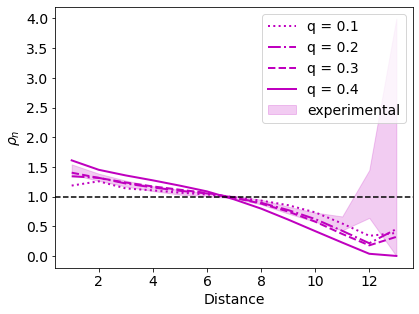

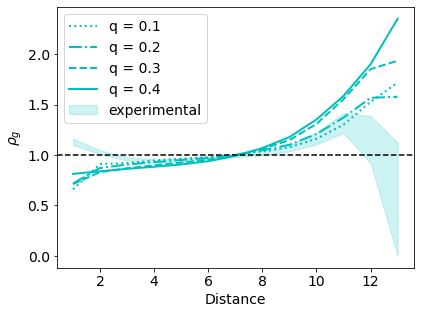

In [87]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from Functions import graphdistance3D, loadExpData, pc_bounds

def paircorrelation(N, G, GraphDist):
    x = np.zeros(len(N))
    x[N > G] = 1
    maxdist = int(np.max(GraphDist))
    ind = np.where(x==1)[0]
    if ind.size == 0:
        P = np.empty(maxdist)
        for i in range(1,maxdist+1):
            P[i-1] = 0
            
    else:
        dist = GraphDist[ind].T[ind].T
        rho0 = sum(x)/len(x)
        rho1 = (sum(x)-1)/(len(x)-1)


        P = np.empty(maxdist)
        for i in range(1,maxdist+1):
            P[i-1] = len(dist[dist==i])/len(GraphDist[GraphDist==i])/rho0/rho1

    return P

ID = 20
#q = 0.2

N, G, Pop, Pos = loadExpData(ID)
GraphDist = graphdistance3D(Pos)
PN_min, PN_max, PG_min, PG_max = pc_bounds(Pop, GraphDist, 1000)

plt.figure(figsize=[6.4, 4.8])
plt.rc('font', size=14)
for q in [0.1,0.2,0.3,0.4]:
    Data = pd.read_csv('C:/Users/sis85wc/Desktop/Cell-Differentiation/Results/Simulation on Organoids/Organoid '+str(ID)+' q='+str(q)+'.csv')
    N = Data['Nanog']
    G = Data['Gata6']

    PN = paircorrelation(N, G, GraphDist)
    ranges = list(range(1,len(PN)+1))

    if q == 0.1:
        style = 'dotted'
    elif q == 0.2:
        style = 'dashdot'
    elif q == 0.3:
        style = 'dashed'
    else:
        style = 'solid'
        
    plt.plot(ranges, PN, 'm', lw=2, linestyle=style, label='q = '+str(q))
    plt.xlabel('Distance')
    plt.ylabel('$\\rho_n$')


plt.axhline(1, color='black', linestyle='dashed')
plt.fill_between(ranges, PN_min, PN_max, color='m', alpha=0.2, label='experimental')
plt.legend()
plt.savefig("Results/Publications/Pattern Formation/PCF NANOG ID = " + str(ID) + ".pdf")
plt.savefig("Results/Publications/Pattern Formation/PCF NANOG ID = " + str(ID) + ".png")

plt.figure(figsize=[6.4, 4.8])
plt.rc('font', size=14)
for q in [0.1,0.2,0.3,0.4]:
    Data = pd.read_csv('C:/Users/sis85wc/Desktop/Cell-Differentiation/Results/Simulation on Organoids/Organoid '+str(ID)+' q='+str(q)+'.csv')
    N = Data['Nanog']
    G = Data['Gata6']

    PG = paircorrelation(G, N, GraphDist)
    ranges = list(range(1,len(PN)+1))

    if q == 0.1:
        style = 'dotted'
    elif q == 0.2:
        style = 'dashdot'
    elif q == 0.3:
        style = 'dashed'
    else:
        style = 'solid'
 
    plt.plot(ranges, PG, 'c', lw=2, linestyle=style, label='q = '+str(q))
    plt.xlabel('Distance')
    plt.ylabel('$\\rho_g$')

plt.axhline(1, color='black', linestyle='dashed')
plt.fill_between(ranges, PG_min, PG_max, color='c', alpha=0.2, label='experimental')
plt.legend()
plt.savefig("Results/Publications/Pattern Formation/PCF GATA6 ID = " + str(ID) + ".pdf")
plt.savefig("Results/Publications/Pattern Formation/PCF GATA6 ID = " + str(ID) + ".png")

Organoid 62 is 48h old
Organoid 62 consists of 1051 cells
Organoid 62 consists of 546 NANOG cells
Organoid 62 consists of 276 GATA6 cells
Organoid 62 has a NANOG:GATA6 ratio of 1.9782608695652173


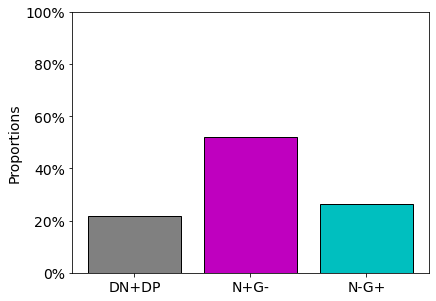

In [107]:
ID = 62
N, G, Pop, Pos = loadExpData(ID)

nofD = len(N[(Pop == 'N-G-') | (Pop == 'N+G+')])/len(N)*100
nofN = len(N[Pop == 'N+G-'])/len(N)*100
nofG = len(N[Pop == 'N-G+'])/len(N)*100

plt.figure(figsize=[6.4, 4.8])
plt.rc('font', size=14)
plt.bar(['DN+DP', 'N+G-', 'N-G+'], [nofD, nofN, nofG], color=['gray', 'm', 'c'], edgecolor='k')
plt.ylim([0,100])
plt.ylabel('Proportions')
ticks = [0,20,40,60,80,100]
plt.yticks(ticks, [str(x)+'%' for x in ticks])
plt.savefig("Results/Publications/Pattern Formation/Proportions ID = " + str(ID) + ".pdf")
plt.savefig("Results/Publications/Pattern Formation/Proportions ID = " + str(ID) + ".png")

Expected cell division time = 3.53156223514816
Expected number of Cells = 861.8099494976175
Organoid with 884 cells is ready!


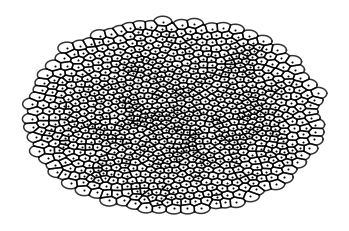

In [54]:
import numpy as np
import matplotlib.pyplot as plt
from FVmesh import initializeFVmesh
from Organoid2D import initializeOrganoid
from Functions import coverPlot, saveData, paircorrelation, fate
from Model import rhs_activation
from Parameters import setParameters
from scipy.integrate import solve_ivp
import pandas as pd

DATA = pd.DataFrame()

Prm = setParameters()
Prm.nofCells_end = 1000
Organoid = initializeOrganoid(Prm, Transcription=False)
print("Organoid with " + str(len(Organoid.Pos)) + " cells is ready!")

FVmesh = initializeFVmesh(Organoid.Pos, Radius = np.ones(len(Organoid.Pos))*np.mean(Organoid.Radius))
FVmesh.plot()

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from FVmesh import initializeFVmesh
from Organoid2D import initializeOrganoid
from Functions import coverPlot, saveData, paircorrelation, fate
from Model import rhs_activation
from Parameters import setParameters
from scipy.integrate import solve_ivp
import pandas as pd

Prm = setParameters()
Prm.T = 240
Prm.nofSteps = 30000
t = np.linspace(0,Prm.T,Prm.nofSteps)

orgdata = pd.read_csv('ratio_size_comparison.csv')

for j in [-6.5,-7,-7.5]:
    DATA = pd.DataFrame()
    for i in range(max(orgdata['ID'])):

        data = orgdata[orgdata['ID']==i]
        Prm.eps_G = j
        x = data['x'].to_numpy()
        y = data['y'].to_numpy()
        Pos = np.concatenate(([x], [y]), axis=0).T
        FVmesh = initializeFVmesh(Pos, Radius = np.ones(len(Pos))*0.8)

        x0 = [Prm.r_N/Prm.gamma_N*3/4, Prm.r_G/Prm.gamma_G*3/4]
        xInit = np.append(np.random.normal(x0[0], x0[0]*0.01, FVmesh.nofCells),
                          np.random.normal(x0[1], x0[1]*0.01, FVmesh.nofCells))
        rhs = lambda t,x: rhs_activation(0, x, Prm, FVmesh)
        sol = np.empty([2*FVmesh.nofCells, Prm.nofSteps+1])
        sol[:,0] = xInit
        for k in range(Prm.nofSteps):
            sol[:,k+1] = sol[:,k] + (t[1]-t[0])*rhs(t[k], sol[:,k])

        N = sol[:FVmesh.nofCells,-1]
        G = sol[FVmesh.nofCells:,-1]
        F = fate(N,G)

        print('ID =', i, 'Total =', len(N), 'NANOG =', len(N[N>G]), 'GATA6 =', len(G[G>N]))

        df = pd.DataFrame()
        df['ID'] = i*np.ones(len(F), dtype=int)
        df['x'] = Pos[:,0]
        df['y'] = Pos[:,1]
        df['fate'] = F
        df['NANOG'] = N
        df['GATA6'] = G
        DATA = DATA.append(df)

    DATA.to_csv('tissue_size_comparison'+str(-j)+'.csv', index=False)

ID = 0 Total = 9 NANOG = 6 GATA6 = 3
ID = 1 Total = 9 NANOG = 7 GATA6 = 2
ID = 2 Total = 9 NANOG = 5 GATA6 = 4
ID = 3 Total = 9 NANOG = 6 GATA6 = 3
ID = 4 Total = 9 NANOG = 6 GATA6 = 3
ID = 5 Total = 10 NANOG = 7 GATA6 = 3
ID = 6 Total = 10 NANOG = 7 GATA6 = 3
ID = 7 Total = 10 NANOG = 7 GATA6 = 3
ID = 8 Total = 12 NANOG = 9 GATA6 = 3
ID = 9 Total = 12 NANOG = 7 GATA6 = 5
ID = 10 Total = 12 NANOG = 8 GATA6 = 4
ID = 11 Total = 12 NANOG = 8 GATA6 = 4
ID = 12 Total = 13 NANOG = 9 GATA6 = 4
ID = 13 Total = 15 NANOG = 10 GATA6 = 5
ID = 14 Total = 15 NANOG = 10 GATA6 = 5
ID = 15 Total = 17 NANOG = 12 GATA6 = 5
ID = 16 Total = 17 NANOG = 12 GATA6 = 5
ID = 17 Total = 18 NANOG = 12 GATA6 = 6
ID = 18 Total = 19 NANOG = 13 GATA6 = 6
ID = 19 Total = 19 NANOG = 13 GATA6 = 6
ID = 20 Total = 19 NANOG = 14 GATA6 = 5
ID = 21 Total = 20 NANOG = 15 GATA6 = 5
ID = 22 Total = 21 NANOG = 14 GATA6 = 7
ID = 23 Total = 21 NANOG = 14 GATA6 = 7
ID = 24 Total = 22 NANOG = 15 GATA6 = 7
ID = 25 Total = 24 NANOG = 1

ID = 0 Total = 9 NANOG = 4 GATA6 = 5
ID = 1 Total = 9 NANOG = 5 GATA6 = 4
ID = 2 Total = 9 NANOG = 3 GATA6 = 6
ID = 3 Total = 9 NANOG = 3 GATA6 = 6
ID = 4 Total = 9 NANOG = 5 GATA6 = 4
ID = 5 Total = 10 NANOG = 5 GATA6 = 5
ID = 6 Total = 10 NANOG = 4 GATA6 = 6
ID = 7 Total = 10 NANOG = 4 GATA6 = 6
ID = 8 Total = 12 NANOG = 4 GATA6 = 8
ID = 9 Total = 12 NANOG = 5 GATA6 = 7
ID = 10 Total = 12 NANOG = 5 GATA6 = 7
ID = 11 Total = 12 NANOG = 5 GATA6 = 7
ID = 12 Total = 13 NANOG = 5 GATA6 = 8
ID = 13 Total = 15 NANOG = 7 GATA6 = 8
ID = 14 Total = 15 NANOG = 6 GATA6 = 9
ID = 15 Total = 17 NANOG = 6 GATA6 = 11
ID = 16 Total = 17 NANOG = 6 GATA6 = 11
ID = 17 Total = 18 NANOG = 8 GATA6 = 10
ID = 18 Total = 19 NANOG = 9 GATA6 = 10
ID = 19 Total = 19 NANOG = 7 GATA6 = 12
ID = 20 Total = 19 NANOG = 9 GATA6 = 10
ID = 21 Total = 20 NANOG = 8 GATA6 = 12
ID = 22 Total = 21 NANOG = 9 GATA6 = 12
ID = 23 Total = 21 NANOG = 9 GATA6 = 12
ID = 24 Total = 22 NANOG = 9 GATA6 = 13
ID = 25 Total = 24 NANOG = 10 

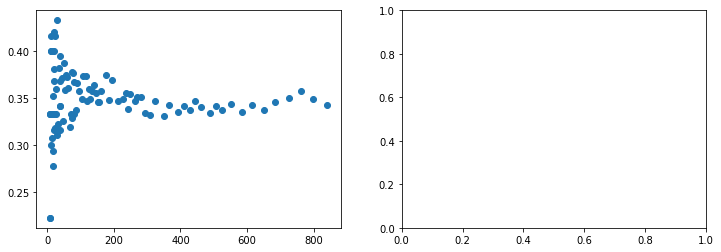

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from FVmesh import initializeFVmesh

DATA = pd.read_csv('tissue_size_comparison7.csv')

IDs = np.unique(DATA['ID'])
size = np.empty(len(IDs))
nofN = np.empty(len(IDs))
nofG = np.empty(len(IDs))
ratio = np.empty(len(IDs))
nofNeigh = np.zeros(len(IDs))
for i in IDs:
    org = DATA[DATA['ID'] == i]
    size[i] = len(org)
    nofN[i] = len(org[org['fate'] == 1])/len(org)
    nofG[i] = len(org[org['fate'] == 0])/len(org)
    ratio[i] = len(org[org['fate'] == 1])/len(org[org['fate'] == 0])
    
    x = org['x'].to_numpy()
    y = org['y'].to_numpy()

    Pos = np.concatenate(([x], [y]), axis=0).T
    #FVmesh = initializeFVmesh(Pos, Radius = 0.8*np.ones(len(Pos)))
    #for k in FVmesh.Neigh:
    #    nofNeigh[i] += len(k)/len(org)
    
    
def f(x, a, b):
    return a*x**(-1/2)+b

from scipy.optimize import curve_fit

plt.figure(figsize=(12,4))
plt.subplot(121)
popt, pcov = curve_fit(f, size, nofG)
plt.scatter(size, nofG)
#plt.plot(size, f(size, *popt), 'r')

plt.subplot(122)
#plt.scatter(size, nofNeigh)

(-9.872881952040313, 10.177833703173237, -9.74660368520022, 9.98459920107164)

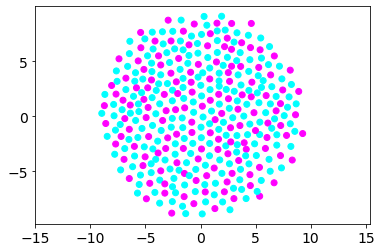

In [60]:
org = DATA[DATA['ID'] == 80]

F = org['fate'].to_numpy()
x = org['x'].to_numpy()
y = org['y'].to_numpy()

plt.scatter(x, y, c=F, cmap='cool')
plt.axis('equal')

[0.65134851] [5.01824884]


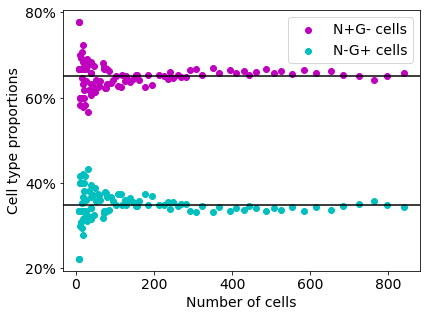

In [85]:
def f(x, a):
    return a*np.ones(len(x))

def g(x, a):
    return a*np.ones(len(x))

def h(x, a, b):
    return  a/g(x, *[-2*np.pi**(1/2)*1.67, 6]) + b

def k(x, a, b):
    return  a*g(x, *[-2*np.pi**(1/2)*1.67, 6]) + b
    

popt_f, pcov = curve_fit(f, size, nofN)
popt_g, pcov = curve_fit(g, size, nofNeigh)
print(popt_f, popt_g)

plt.figure(figsize=[6.4, 4.8])
plt.rc('font', size=14)
plt.scatter(size, nofN*100, color='m', label='N+G- cells')
plt.scatter(size, nofG*100, color='c', label='N-G+ cells')
#plt.plot(size, f(size, *popt_f)*100, 'k', lw=2, label='$\sigma_n(M)$, $\sigma_g(M)$')
#plt.plot(size, 1*100-f(size, *popt_f)*100, 'k', lw=2)
plt.axhline(np.mean(nofN)*100, color='k')
plt.axhline(np.mean(nofG)*100, color='k')
plt.xlabel('Number of cells')
plt.ylabel('Cell type proportions')
ticks = [20,40,60,80]
plt.yticks(ticks, [str(x)+'%' for x in ticks])
plt.legend()
plt.savefig("Results/Publications/Pattern Formation/proportions_size.pdf")
plt.savefig("Results/Publications/Pattern Formation/proportions_size.png")

## Different Ranges and Ratios

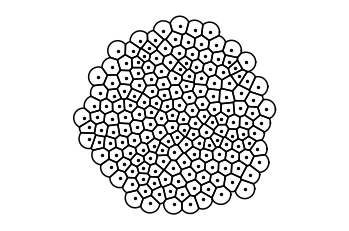

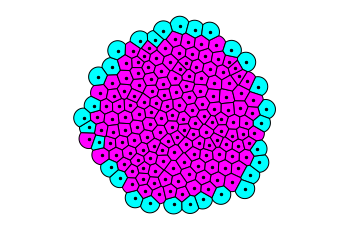

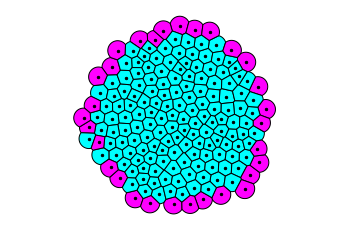

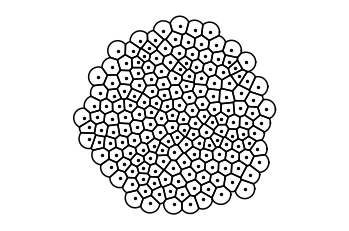

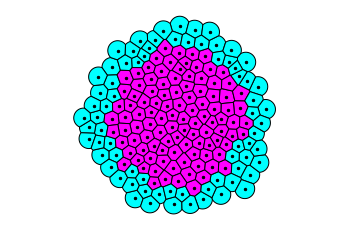

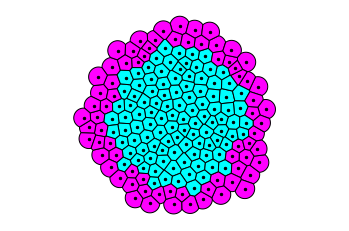

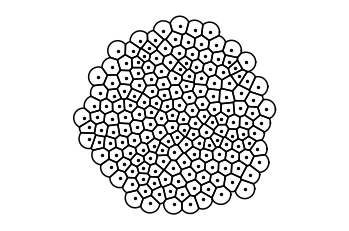

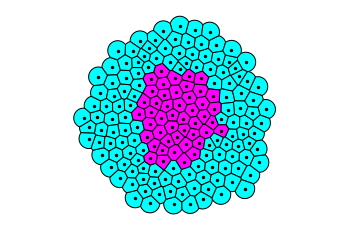

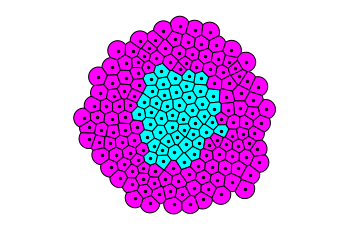

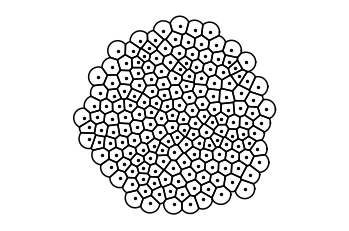

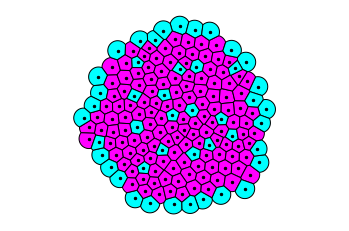

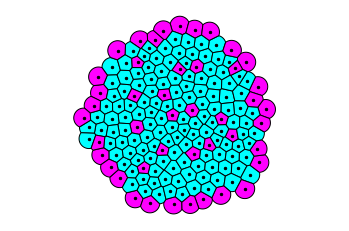

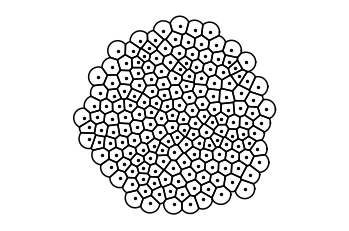

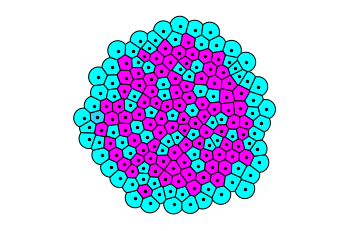

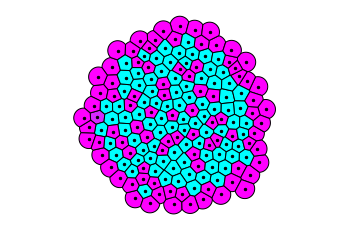

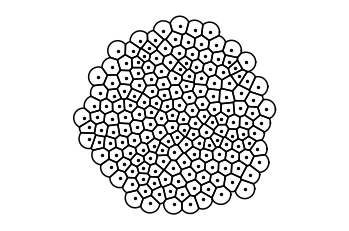

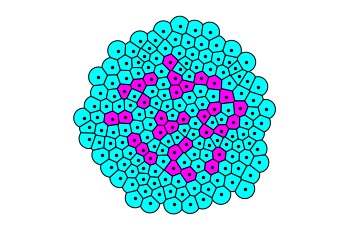

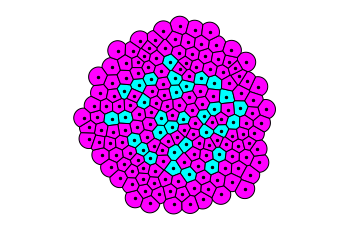

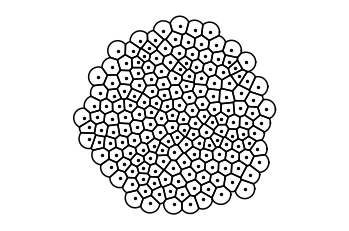

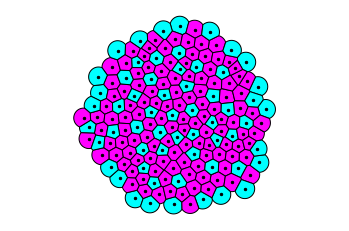

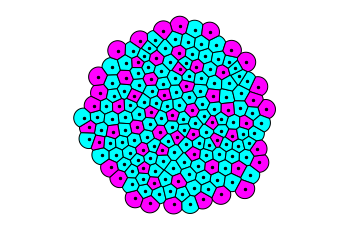

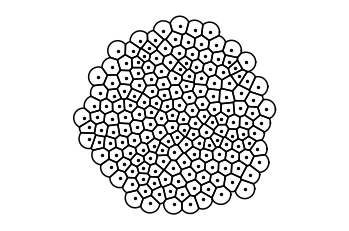

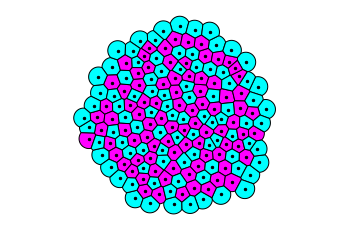

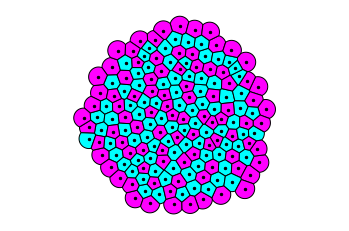

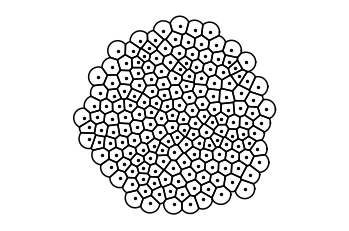

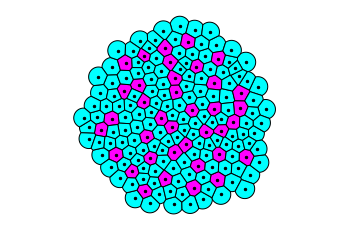

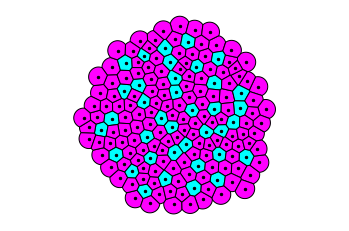

In [4]:
from Organoid2D_new import Organoid
import matplotlib.pyplot as plt


eps_G = [-6.5, -7, -7.5]
q = [.9, .5, .1]
# Plot the result
#plt.figure(figsize=(12,12))
for i in range(3):
    for j in range(3):
        #plt.subplot(3, 3, i*3 + j+1)
        org = Organoid()
        org.q = q[i]
        org.eps_G = eps_G[j]
        org.evolution(T=40, file = 'Organoid_mid.csv', mode='transcription')
        org.saveData(directory = 'Results/Publications/Signal Range/eps_G='+str(-org.eps_G)+' q='+str(org.q)+'/')
        #org.cellPlot(org.N, size=0)

0.717767937343398


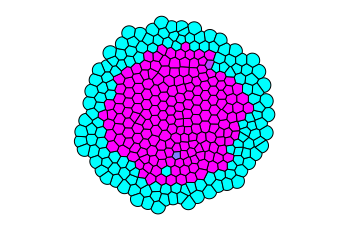

In [5]:
import numpy as np

org = Organoid()
org.q = .9
org.eps_G = -7
org.evolution(T=20, file = 'Organoid_large.csv', mode='transcription')
org.cellPlot(org.N, size=0)

# Weights
W = org.GraphDist
W[W > 1] = 0

# Fates
F = np.empty(org.N.shape)
F[org.N > org.G] = 1
F[org.N <= org.G] = 0

test = F - F.mean()
numerator = (test*test[:,None])*W
denominator = test**2

I = org.nofCells/np.sum(W)*np.sum(numerator)/np.sum(denominator)
print(I)

## Proportions

In [18]:
from Organoid2D_new import Organoid
import matplotlib.pyplot as plt
import numpy as np

org = Organoid()
s_max = org.r_G/org.gamma_G
upper_boundary = -org.eps_N + np.log(1 + np.exp(-org.eps_S-org.eps_NS)*s_max)
eps_G = np.linspace(6,upper_boundary,20)
q = 0.9

Ratio = np.empty(eps_G.shape)
for i in range(len(eps_G)):
    org = Organoid()
    org.eps_G = -eps_G[i]
    org.q = q
    org.evolution(T=40, file = 'Organoid_mid.csv', mode='transcription')
    F = [1 if org.N[i] >= org.G[i] else 0 for i in range(len(org.N))]

    Ratio[i] = np.sum(F)/org.nofCells

In [ ]:
plt.figure(figsize=[6.4, 4.8])
plt.rc('font', size=14)
plt.bar(eps_G, Ratio*100, width=0.06, color = 'm', edgecolor='k', alpha = 1, label='N+G-')
plt.bar(eps_G, (1-Ratio)*100, bottom=Ratio*100, width=0.06, color = 'c', edgecolor='k', alpha = 1, label='N-G+')
ticks = [0,20,40,60,80,100]
plt.yticks(ticks, [str(x)+'%' for x in ticks])
plt.xlabel('$-\Delta\epsilon_g$')
plt.ylabel('Proportions')
plt.gcf().subplots_adjust(bottom=0.15)
plt.gcf().subplots_adjust(left=0.2)
plt.legend(framealpha=1)
plt.savefig('Results/Publications/Signal Range/Proportions q=0.9.pdf')
plt.savefig('Results/Publications/Signal Range/Proportions q=0.9.png')

## PCFs wrt Range

In [62]:
from Organoid2D_new import Organoid
import matplotlib.pyplot as plt
import numpy as np

def pcf(N, G, GraphDist):
    x = np.zeros(len(N))
    x[N > G] = 1
    maxdist = int(np.max(GraphDist))
    ind = np.where(x==1)[0]
    if ind.size == 0:
        P = np.empty(maxdist)
        for i in range(1,maxdist+1):
            P[i-1] = 0
            
    else:
        dist = GraphDist[ind].T[ind].T
        rho0 = sum(x)/len(x)
        rho1 = (sum(x)-1)/(len(x)-1)


        P = np.empty(maxdist)
        for i in range(1,maxdist+1):
            P[i-1] = len(dist[dist==i])/len(GraphDist[GraphDist==i])/rho0/rho1

    return P

PN = []
PG = []
eps_G_list = []
ratio = 88/177

for i in range(10):
    r = 1
    k = 0
    lower_boundary = -6
    upper_boundary = -7.86
    eps_G = (lower_boundary+upper_boundary)/2
    while r != ratio:
        org = Organoid()
        org.eps_G = eps_G
        org.q = 0.1*i
        org.evolution(T=20, file = 'Organoid_mid.csv', mode='transcription')
        F = [1 if org.N[i] >= org.G[i] else 0 for i in range(len(org.N))]
        r = sum(F)/len(F)
        k += 1
        print('Iteration: '+str(k)+' Ratio: '+str(r)+' Current eps_G: '+str(eps_G))
        
        if r > ratio:
            lower_boundary = eps_G
        elif r <= ratio:
            upper_boundary = eps_G
            
        eps_G = (lower_boundary+upper_boundary)/2

    PN.append(pcf(org.N, org.G, org.GraphDist))
    PG.append(pcf(org.G, org.N, org.GraphDist))
    eps_G_list.append(eps_G)

Iteration: 1 Ratio: 0.4858757062146893 Current eps_G: -6.93
Iteration: 2 Ratio: 0.672316384180791 Current eps_G: -6.465
Iteration: 3 Ratio: 0.5875706214689266 Current eps_G: -6.6975
Iteration: 4 Ratio: 0.576271186440678 Current eps_G: -6.81375
Iteration: 5 Ratio: 0.4858757062146893 Current eps_G: -6.871874999999999
Iteration: 6 Ratio: 0.576271186440678 Current eps_G: -6.842812499999999
Iteration: 7 Ratio: 0.4858757062146893 Current eps_G: -6.857343749999999
Iteration: 8 Ratio: 0.576271186440678 Current eps_G: -6.850078125
Iteration: 9 Ratio: 0.5423728813559322 Current eps_G: -6.853710937499999
Iteration: 10 Ratio: 0.4915254237288136 Current eps_G: -6.8555273437499995
Iteration: 11 Ratio: 0.519774011299435 Current eps_G: -6.854619140624999
Iteration: 12 Ratio: 0.4971751412429379 Current eps_G: -6.855073242187499
Iteration: 1 Ratio: 0.4858757062146893 Current eps_G: -6.93
Iteration: 2 Ratio: 0.672316384180791 Current eps_G: -6.465
Iteration: 3 Ratio: 0.5932203389830508 Current eps_G: -6.

Parameters used: [-6.854846191406249, -6.9191015625, -6.9590625, -6.989941406250001, -7.00265625, -6.995390625000001, -6.9590625, -7.00265625, -7.0625976562499995, -7.04625]


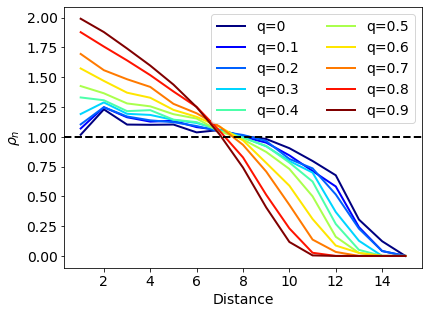

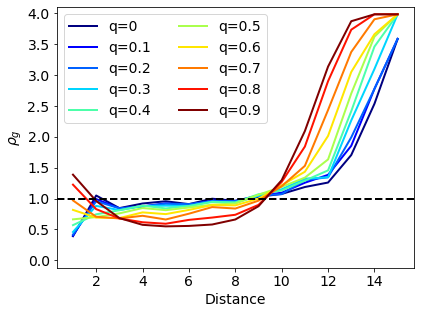

In [113]:
import matplotlib

cmap = matplotlib.cm.get_cmap('jet')
#test = np.linspace(0,1,len(PN))
distances = [j for j in range(1,int(np.max(org.GraphDist))+1)]
plt.figure(figsize=[6.4, 4.8])
plt.rc('font', size=14)
q = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
for i in range(len(PN)):
    rgba = cmap(test[i])
    
    plt.plot(distances,PN[i], color = rgba, lw=2, label='q='+str(q[i]))
    
plt.axhline(1, color='k', ls = 'dashed', lw = 2)
plt.legend(ncol=2)    
plt.xlabel('Distance')
plt.ylabel('$\\rho_n$')
#plt.ylim([0-0.12, max([np.max(PN), np.max(PG)])+0.12])
plt.savefig('Results/Publications/Signal Range/pair_correlation_n.pdf', transparent=True)
plt.savefig('Results/Publications/Signal Range/pair_correlation_n.png', transparent=True)

plt.figure(figsize=[6.4, 4.8])
plt.rc('font', size=14)
for i in range(len(PG)):
    rgba = cmap(test[i])
    
    plt.plot(distances,PG[i], color = rgba, lw=2, label='q='+str(q[i]))

plt.axhline(1, color='k', ls = 'dashed', lw = 2)
plt.legend(ncol=2)
plt.xlabel('Distance')
plt.ylabel('$\\rho_g$')
plt.ylim([0-0.12, max([np.max(PN), np.max(PG)])+0.12])
#sm = plt.cm.ScalarMappable(cmap='jet', norm=plt.Normalize(vmin=0, vmax=1))
#cbar = plt.colorbar(sm)
#cbar.ax.set_yticklabels([])
#cbar.set_label('$-\Delta\epsilon_g$')
plt.savefig('Results/Publications/Signal Range/pair_correlation_g.pdf', transparent=True)
plt.savefig('Results/Publications/Signal Range/pair_correlation_g.png', transparent=True)

print('Parameters used:', eps_G_list)

## Organoid Data Application

In [59]:
#### import numpy as np
import pandas as pd
from Organoid3D import Organoid
from scipy.spatial.distance import cdist


#### Import Geometry ####
DATA = pd.read_csv('Data/includingSurfaceDistance/extendedRawDataICMOrganoids.csv')

IDs = [62] #[14, 20, 29, 52, 62, 68]
Qs = [0.1, 0.2, 0.3, 0.4]
for i in IDs:
    for Q in Qs:
        ID = i
        q = Q

        Data = DATA[DATA['OrganoidID']==ID]
        print('Organoid', ID, 'is', Data.iloc[0,1], 'old')
        print('Organoid', ID, 'consists of', len(Data), 'cells')
        xyz = Data[["CentroidX", "CentroidY", "CentroidZ"]].to_numpy()
        Pop = np.array(Data['Population'])
        dist = cdist(xyz, xyz)

        df1 = pd.DataFrame()
        df1['x-Position'] = xyz[:,0]
        df1['y-Position'] = xyz[:,1]
        df1['z-Position'] = xyz[:,2]
        df1['Radius'] = 50*np.ones(len(xyz))
        df1.to_csv('Results/Publications/Signal Range/Simulation on Organoids/RawGeometry.csv', index=False)

        nofCalc = 0
        r = 0
        ratio = len(Data[Pop=='N+G-'])/len(Data[Pop=='N-G+'])
        offset = 0.1
        lower_boundary = -6
        upper_boundary = -7.86
        eps_G = -6.6975#(lower_boundary+upper_boundary)/2
        while (r < ratio - ratio*offset or r > ratio + ratio*offset) and nofCalc < 10:
            org = Organoid()
            org.eps_G = eps_G
            org.q = q
            org.nofSteps = 3000
            org.evolution(T=40, file = 'Results/Publications/Signal Range/Simulation on Organoids/RawGeometry.csv',
                          mode='transcription')
            F = [1 if org.N[i] >= org.G[i] else 0 for i in range(len(org.N))]
            r = sum(F)/(len(F)-sum(F))
            nofCalc += 1
            print('Iteration: '+str(nofCalc)+' Current: '+str(r)+' Aim: '+str(ratio)+' Current eps_G: '+str(eps_G))

            if r > ratio:
                lower_boundary = eps_G
            elif r <= ratio:
                upper_boundary = eps_G

            eps_G0 = eps_G
            eps_G = (lower_boundary+upper_boundary)/2

        df = pd.DataFrame()
        df['x-Position'] = org.xyz[:,0]
        df['y-Position'] = org.xyz[:,1]
        df['z-Position'] = org.xyz[:,2]
        df['Radius'] = org.r
        df['Nanog'] = org.N
        df['Gata6'] = org.G
        df['eps_G'] = eps_G0

        df.to_csv('Results/Publications/Signal Range/Simulation on Organoids/Organoid '+str(ID)+' q='+str(q)+' 100.csv', index=False)
        print('Finished!!!')

Organoid 62 is 48h old
Organoid 62 consists of 1051 cells
Iteration: 1 Current: 1.9033149171270718 Aim: 1.9782608695652173 Current eps_G: -6.6975
Finished!!!
Organoid 62 is 48h old
Organoid 62 consists of 1051 cells
Iteration: 1 Current: 1.9943019943019944 Aim: 1.9782608695652173 Current eps_G: -6.6975
Finished!!!
Organoid 62 is 48h old
Organoid 62 consists of 1051 cells
Iteration: 1 Current: 2.0028571428571427 Aim: 1.9782608695652173 Current eps_G: -6.6975
Finished!!!
Organoid 62 is 48h old
Organoid 62 consists of 1051 cells
Iteration: 1 Current: 2.03757225433526 Aim: 1.9782608695652173 Current eps_G: -6.6975
Finished!!!


Organoid 62 is 48h old
Organoid 62 consists of 1051 cells
Organoid 62 consists of 546 NANOG cells
Organoid 62 consists of 276 GATA6 cells
Organoid 62 has a NANOG:GATA6 ratio of 1.9782608695652173


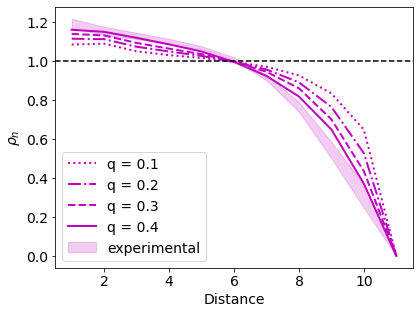

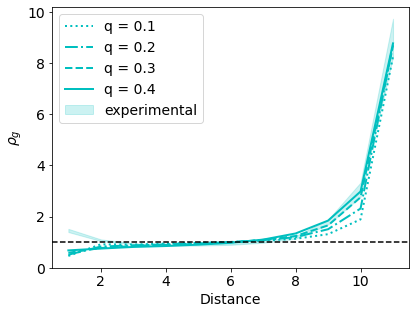

In [62]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from Functions import graphdistance3D, loadExpData, pc_bounds

def paircorrelation(N, G, GraphDist):
    x = np.zeros(len(N))
    x[N > G] = 1
    maxdist = int(np.max(GraphDist))
    ind = np.where(x==1)[0]
    if ind.size == 0:
        P = np.empty(maxdist)
        for i in range(1,maxdist+1):
            P[i-1] = 0
            
    else:
        dist = GraphDist[ind].T[ind].T
        rho0 = sum(x)/len(x)
        rho1 = (sum(x)-1)/(len(x)-1)


        P = np.empty(maxdist)
        for i in range(1,maxdist+1):
            P[i-1] = len(dist[dist==i])/len(GraphDist[GraphDist==i])/rho0/rho1

    return P

ID = 62 #[14, 20, 29, 52, 62, 68]
#q = 0.2

N, G, Pop, Pos = loadExpData(ID)
GraphDist = graphdistance3D(Pos, cutoff=80)
PN_min, PN_max, PG_min, PG_max = pc_bounds(Pop, GraphDist, 100)

plt.figure(figsize=[6.4, 4.8])
plt.rc('font', size=14)
for q in [0.1,0.2,0.3,0.4]:
    Data = pd.read_csv('Results/Publications/Signal Range/Simulation on Organoids/Organoid '+str(ID)+' q='+str(q)+' 80.csv')
    N = Data['Nanog']
    G = Data['Gata6']

    PN = paircorrelation(N, G, GraphDist)
    ranges = list(range(1,len(PN)+1))

    if q == 0.1:
        style = 'dotted'
    elif q == 0.2:
        style = 'dashdot'
    elif q == 0.3:
        style = 'dashed'
    else:
        style = 'solid'
        
    plt.plot(ranges, PN, 'm', lw=2, linestyle=style, label='q = '+str(q))
    plt.xlabel('Distance')
    plt.ylabel('$\\rho_n$')

ranges = list(range(1,len(PN_min)+1))
plt.axhline(1, color='black', linestyle='dashed')
plt.fill_between(ranges, PN_min, PN_max, color='m', alpha=0.2, label='experimental')
plt.legend()
plt.savefig("Results/Publications/Signal Range/PCF NANOG ID = " + str(ID) + ".pdf", transparent=True)
plt.savefig("Results/Publications/Signal Range/PCF NANOG ID = " + str(ID) + ".png", transparent=True)

plt.figure(figsize=[6.4, 4.8])
plt.rc('font', size=14)
for q in [0.1,0.2,0.3,0.4]:
    Data = pd.read_csv('Results/Publications/Signal Range/Simulation on Organoids/Organoid '+str(ID)+' q='+str(q)+' 80.csv')
    N = Data['Nanog']
    G = Data['Gata6']

    PG = paircorrelation(G, N, GraphDist)
    ranges = list(range(1,len(PN)+1))

    if q == 0.1:
        style = 'dotted'
    elif q == 0.2:
        style = 'dashdot'
    elif q == 0.3:
        style = 'dashed'
    else:
        style = 'solid'
 
    plt.plot(ranges, PG, 'c', lw=2, linestyle=style, label='q = '+str(q))
    plt.xlabel('Distance')
    plt.ylabel('$\\rho_g$')

plt.axhline(1, color='black', linestyle='dashed')
plt.fill_between(ranges, PG_min, PG_max, color='c', alpha=0.2, label='experimental')
plt.legend()
plt.savefig("Results/Publications/Signal Range/PCF GATA6 ID = " + str(ID) + ".pdf", transparent=True)
plt.savefig("Results/Publications/Signal Range/PCF GATA6 ID = " + str(ID) + ".png", transparent=True)

Organoid 62 is 48h old
Organoid 62 consists of 1051 cells
Organoid 62 consists of 546 NANOG cells
Organoid 62 consists of 276 GATA6 cells
Organoid 62 has a NANOG:GATA6 ratio of 1.9782608695652173


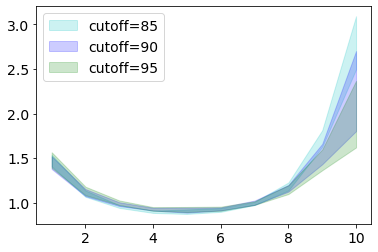

In [49]:
ID = 62 #[14, 20, 29, 52, 62, 68]

N, G, Pop, Pos = loadExpData(ID)
GraphDist1 = graphdistance3D(Pos, cutoff=85)
PN_min1, PN_max1, PG_min1, PG_max1 = pc_bounds(Pop, GraphDist1, 100)
GraphDist2 = graphdistance3D(Pos, cutoff=90)
PN_min2, PN_max2, PG_min2, PG_max2 = pc_bounds(Pop, GraphDist2, 100)
GraphDist3 = graphdistance3D(Pos, cutoff=95)
PN_min3, PN_max3, PG_min3, PG_max3 = pc_bounds(Pop, GraphDist3, 100)

ranges1 = list(range(1,len(PN_min1)+1))
ranges2 = list(range(1,len(PN_min2)+1))
ranges3 = list(range(1,len(PN_min3)+1))
plt.fill_between(ranges1, PG_min1, PG_max1, color='c', alpha=0.2, label='cutoff=85')
plt.fill_between(ranges2, PG_min2, PG_max2, color='b', alpha=0.2, label='cutoff=90')
plt.fill_between(ranges3, PG_min3, PG_max3, color='g', alpha=0.2, label='cutoff=95')
plt.legend(loc='upper left')

## Cell number

<Figure size 460.8x345.6 with 0 Axes>

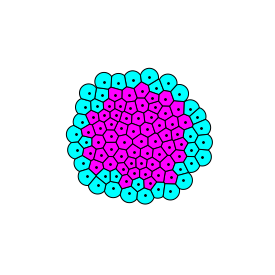

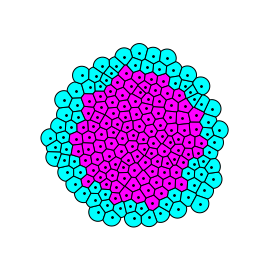

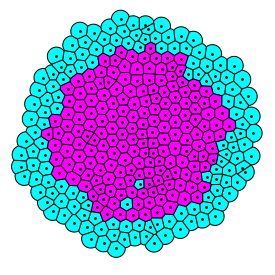

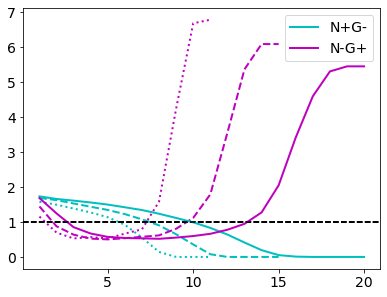

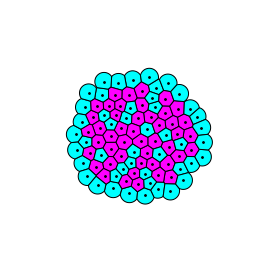

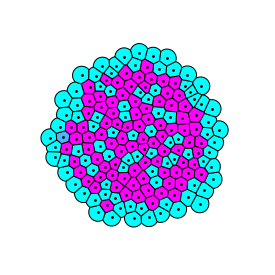

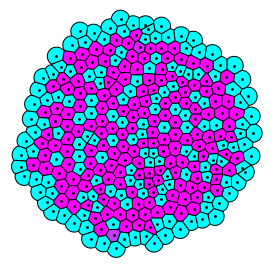

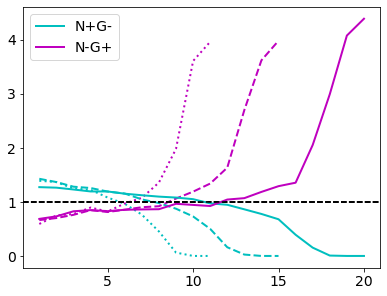

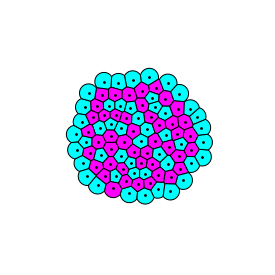

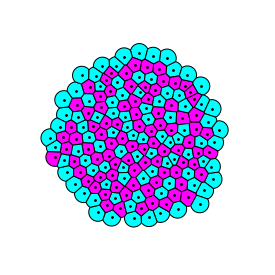

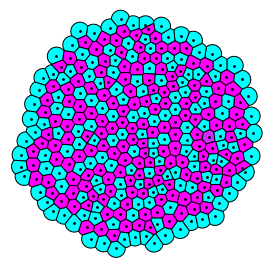

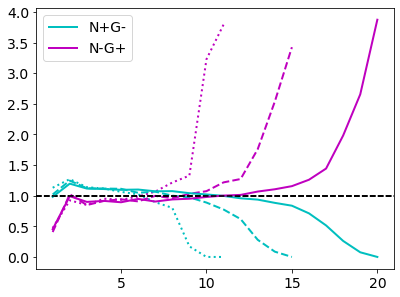

In [2]:
from Organoid2D_new import Organoid
import matplotlib.pyplot as plt
import numpy as np

q = [.9, .5, .1]
# Plot the result
fig = plt.figure(figsize=[6.4, 4.8])
for i in range(3):
    #plt.subplot(3, 3, i*3 + j+1)
    org_s = Organoid()
    org_m = Organoid()
    org_l = Organoid()
    org_s.q = q[i]
    org_m.q = q[i]
    org_l.q = q[i]
    org_s.evolution(T=40, file = 'Organoid_small.csv', mode='transcription')
    org_m.evolution(T=40, file = 'Organoid_mid.csv', mode='transcription')
    org_l.evolution(T=40, file = 'Organoid_large.csv', mode='transcription')
    
    size = 1000/len(org_l.xy)
    #org.saveData(directory = 'Results/Publications/Signal Range/'+size[j]+' q='+str(org.q)+'/')
    lims = np.max(abs(org_l.xy))+1.5
    plt.figure(figsize=[6.4, 4.8])
    org_s.cellPlot(org_s.N, size=size)
    plt.xlim([-lims, lims])
    plt.ylim([-lims, lims])
    plt.gca().set_adjustable("box")
    plt.savefig('Results/Publications/Signal Range/Cell number variation/small q='+str(org_s.q)+'.png', transparent=True)
    plt.savefig('Results/Publications/Signal Range/Cell number variation/small q='+str(org_s.q)+'.pdf', transparent=True)
    
    plt.figure(figsize=[6.4, 4.8])
    org_m.cellPlot(org_m.N, size=size)
    plt.xlim([-lims, lims])
    plt.ylim([-lims, lims])
    plt.gca().set_adjustable("box")
    plt.savefig('Results/Publications/Signal Range/Cell number variation/medium q='+str(org_m.q)+'.png', transparent=True)
    plt.savefig('Results/Publications/Signal Range/Cell number variation/medium q='+str(org_m.q)+'.pdf', transparent=True)
    
    plt.figure(figsize=[6.4, 4.8])
    org_l.cellPlot(org_l.N, size=size)
    plt.xlim([-lims, lims])
    plt.ylim([-lims, lims])
    plt.gca().set_adjustable("box")
    plt.savefig('Results/Publications/Signal Range/Cell number variation/large q='+str(org_l.q)+'.png', transparent=True)
    plt.savefig('Results/Publications/Signal Range/Cell number variation/large q='+str(org_l.q)+'.pdf', transparent=True)
    
    plt.figure(figsize=[6.4, 4.8])
    org_s.pcf(ls='dotted', legend=False)
    org_m.pcf(ls='dashed', legend=False)
    org_l.pcf(ls='solid', legend=True)   
    plt.savefig('Results/Publications/Signal Range/Cell number variation/pcf q='+str(org_s.q)+'.png', transparent=True)
    plt.savefig('Results/Publications/Signal Range/Cell number variation/pcf q='+str(org_s.q)+'.pdf', transparent=True)

In [3]:
print(org_s.nofCells, org_m.nofCells, org_l.nofCells)

93 177 324
